 # Data Ingestion and Derived Returns Workbook

In [1]:
import os
import pickle
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sys import platform
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# **Question 1**

Jasmin aims to grow her wealth through peer-to-peer loans by maximizing returns while managing default risk. Success will depend on making smart, data-driven investment decisions.

What type of investment strategy should Jasmin adopt to maximize returns while managing risk?

*   Jasmin needs to decide between a random strategy, a default-based strategy, a return-based strategy, or a combined default-and-return strategy.

How should Jasmin calculate returns to evaluate loan performance accurately?

*   Jasmin should decide whether to use an optimistic strategy (full payment), a pessimistic strategy (no recovery after default), or an intermediate strategy (partial recovery after default).

How should Jasmin diversify her portfolio across LendingClub’s loan grades and terms?

*   She should determine whether to focus on low-risk or high-return loans and decide between short-term (36-month) or long-term (60-month) loans.

How effective is LendingClub's loan grading system in predicting returns?

*   Jasmin can validate the usefulness of the grade variable by comparing it with returns and clustering patterns.

How can Jasmin identify high-return, low-risk loans to build a stable portfolio?


*   She should assess loan characteristics like borrower income, credit history, loan purpose, and employment status to balance risk and return.

A "good" decision is to get a return without taking on excessive risks. Jasmin can measure success by looking at the following KPIs:

1.	Portfolio ROI – Measures how much profit she’s making relative to the amount invested. High ROI means the investment strategy is working.
2.	Default Rate – Tracks how many loans are going bad. A rising default rate means Jasmin may need to adjust her strategy.
3.	Sharpe Ratio – Measures whether she’s getting enough return for the level of risk she’s taking. A higher Sharpe Ratio means she’s managing risk well.
4.	Loan Grade Distribution – Spreading her bets across different loan grades will protect her from big losses.
5.	Loan Term Diversity – A healthy mix of short- and long-term loans will balance her cash flow and reduce reinvestment risk.
6.	Recovery Rate – Even if some loans default, recovering a portion of the amount owed will soften the impact.

 ## Download

In [2]:
#You can download the archived data for 2014 from the WayBack machine here:
# https://web.archive.org/web/20220618001912/https://resources.lendingclub.com/LoanStats3c.csv.zip
# For the 2015 data, use
# https://web.archive.org/web/20230522033024/https://resources.lendingclub.com/LoanStats3d.csv.zip
# Download both zip files and unzip them.
# Put both these unzipped files in the appropriate folder ("../data" below) before proceeding below.
# The data dictionary is here: https://web.archive.org/web/20200606105339/https://resources.lendingclub.com/LCDataDictionary.xlsx}
dir_data = pd.read_csv('/content/LoanStats3c.csv')

<ipython-input-2-6ee62e6db3da>:8: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,47,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  dir_data = pd.read_csv('/content/LoanStats3c.csv')


In [3]:
dir_data.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                      emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       15000     15000       15000            60 months  12.39%  336.64      C     C1        MANAGEMENT                     10+ years  RENT           78000      Source Verified     Dec-2014 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      235xx    VA         12.03 0           Aug-1994         0              NaN                    NaN                    6        0       138008    29%        17        w                   0.00      0.00          17392.37         17392.37        15000.00        2392.37       0.0                0.0        0.0                     Jun-2016     12017.81        NaN          Apr-2022           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            149140      NaN         NaN         NaN         NaN         NaN                NaN          NaN     NaN         NaN         NaN        NaN      184500           NaN    NaN         NaN          5                    29828       9525           4.7     0                        0           103                244                  1                     1              0        47                   NaN                      NaN                   NaN                            0                     1              4               1           2         8         5             9             4                   6        0                0            0                  4                  10

 ## Ingestion
 Ingest the data files from both sets, perform consistency checks, and prepare one single file for each set

In [4]:
from typing import Dict
def ingest_files(directory: str) -> Dict:
    """
    This function will ingest the CSV file in the specified directory
    into a pandas dataframe. It will return a dictionary containing
    the dataframe, keyed by the file name.

    We assume the directory contains the 'LoanStats3c 2.csv' file.
    """
    file_name = 'LoanStats3c.csv' # name of the csv file
    file_path = os.path.join(directory, file_name)

    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    print(f"Reading file {file_name} from directory {directory}")

    # Read the csv file into a pandas dataframe
    output = {file_name: pd.read_csv(file_path, dtype=str, skiprows=1)}

    return output

# Call the function with the directory containing the CSV file
files_data = ingest_files("/content/")

Reading file LoanStats3c.csv from directory /content/


In [5]:
files_data.keys()

dict_keys(['LoanStats3c.csv'])

In [6]:
data_now = pd.concat(files_data.values()).reset_index(drop = True)
columns = list(data_now.columns)
columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

 ## Choose Columns and Prepare Dataset

# **Question 2**

The additional variables enhance Jasmin’s ability to develop a balanced investment strategy. `inq_last_6mths`, `collections_12_mths_ex_med`, and `acc_now_delinq` help identify high-risk borrowers, supporting a default-based strategy and improving risk prediction. `total_rec_prncp`, `total_rec_int`, and `total_rec_late_fee` directly contribute to ROI calculation, aiding in both return-based and combined default-and-return strategies. `application_type` and `total_acc` support diversification by identifying borrower profiles and managing exposure.  `last_credit_pull_d` helps assess whether recent credit behavior aligns with expected risk. These insights help Jasmin maximize returns while managing risk effectively.

In [7]:
# Identify the columns we'll be keeping from the dataset
cols_to_pick = ['id','loan_amnt','funded_amnt','term','int_rate',
                 'installment','grade','emp_length', 'home_ownership',
                 'annual_inc','verification_status','issue_d',
                 'loan_status','purpose','dti', 'delinq_2yrs',
                 'earliest_cr_line','open_acc','pub_rec',
                 'revol_bal','revol_util', 'total_pymnt',
                 'last_pymnt_d', 'recoveries','application_type', 'inq_last_6mths', 'collections_12_mths_ex_med',
                 'acc_now_delinq', 'total_acc', 'total_rec_prncp', 'total_rec_int',
                 'total_rec_late_fee', 'last_credit_pull_d']

# Identify the type of each of these columns
float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
              'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
              'total_pymnt', 'recoveries', 'inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq',
              'total_acc', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

cat_cols = ['term', 'grade', 'emp_length', 'home_ownership',
            'verification_status', 'loan_status', 'purpose',
            'application_type']

perc_cols = ['int_rate', 'revol_util']

date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

# Ensure that we have types for every column
assert set(cols_to_pick) - set(float_cols) - set(cat_cols) - set(perc_cols) - set(date_cols) == set(["id"])

In [8]:
# Keep only the columns of interest
final_data = data_now[cols_to_pick].copy()
final_data.to_pickle('/content/save_lendingclub_2014.pkl')

In [9]:
print("Starting with " + str(len(final_data)) + " rows")


Starting with 73636 rows


 ### Suggestions

 You can choose a few more (3-10) variables and add them to the list of variables below

 You should consult the data description (excel) file you downloaded to understand the definition of various available columns

 TIP: If you added new variables, be sure to clean them as we just did for the default variables.

 You will have to add them to the group of the right type of variables (e.g. percentage, date, categorical)


 ### Typecast the columns

In [10]:
for i in float_cols:
    final_data[i] = final_data[i].astype(float)

def clean_perc(x):
    if pd.isnull(x):
        return np.nan
    else:
        return float(x.rstrip()[:-1])
for i in perc_cols:
    final_data[i] = final_data[i].apply( clean_perc )

def clean_date(x):
    if pd.isnull(x):
        return None
    else:
        return datetime.datetime.strptime( x, "%b-%Y").date()
for i in date_cols:
    final_data[i] = final_data[i].apply( clean_date )

for i in cat_cols:
    final_data.loc[final_data[i].isnull(), i] = None


In [11]:
final_data.head()


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,application_type,inq_last_6mths,collections_12_mths_ex_med,acc_now_delinq,total_acc,total_rec_prncp,total_rec_int,total_rec_late_fee,last_credit_pull_d
0,NaN,15000.0,15000.0,60 months,12.39,336.64,C,10+ years,RENT,78000.0,...,0.00,Individual,0.0,0.0,0.0,17.0,15000.00,2392.37,0.0,2022-04-01
1,NaN,10400.0,10400.0,36 months,6.99,321.08,A,8 years,MORTGAGE,58000.0,...,521.27,Individual,2.0,0.0,0.0,36.0,5217.75,872.67,0.0,2017-02-01
2,NaN,7650.0,7650.0,36 months,13.66,260.20,C,< 1 year,RENT,50000.0,...,1237.99,Individual,1.0,0.0,0.0,20.0,704.38,339.61,0.0,2021-11-01
3,NaN,12800.0,12800.0,60 months,17.14,319.08,D,10+ years,MORTGAGE,125000.0,...,0.00,Individual,0.0,0.0,0.0,13.0,12800.00,6365.35,0.0,2022-04-01
4,NaN,21425.0,21425.0,60 months,15.59,516.36,D,6 years,RENT,63800.0,...,0.00,Individual,0.0,0.0,0.0,35.0,21425.00,4087.20,0.0,2018-04-01


In [12]:
# Deal with null values. We allow categorical variables to be null
# OTHER than grade, which is a particularly important categorical.
# All non-categorical variables must be non-null, and we drop
# rows that do not meet this requirement
required_cols = set(cols_to_pick) - set(cat_cols) - set(["id"])
required_cols.add("grade")

n_rows = len(final_data)
final_data.dropna(subset = required_cols ,inplace=True)
print("Removed " + str(n_rows - len(final_data)) + " rows")

Removed 102 rows


#  **Calculate returns for each loan**

In [13]:
### Define the names of the four returns we'll be calculating

ret_cols = ["ret_PESS", "ret_OPT", "ret_INTa", "ret_INTb", "ret_INTc"]

In [14]:
## Remove all rows for loans that were paid back on the days
# they were issued
final_data['loan_length'] = (final_data.last_pymnt_d - final_data.issue_d) / np.timedelta64(1, 'D')  # Changed to 'D' for days
final_data['loan_length'] = final_data['loan_length'] / 30.436875  # approximate average number of days in a month.
n_rows = len(final_data)
final_data = final_data[final_data.loan_length != 0]
print("Removed " + str(n_rows - len(final_data)) + " rows")

Removed 30 rows


#### Return Method 2 (pessimistic)

In [15]:
# Calculate the return using a simple annualized profit margin
# Pessimistic definition (method 2)

final_data['term_num'] = final_data.term.str.extract('(\d+)',expand=False).astype(int)
final_data['ret_PESS'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['term_num'])

<ipython-input-15-aca5240d5e9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['term_num'] = final_data.term.str.extract('(\d+)',expand=False).astype(int)
<ipython-input-15-aca5240d5e9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ret_PESS'] = ( (final_data.total_pymnt - final_data.funded_amnt)


#### Return Method 1 (optimistic)

In [16]:
# Assuming that if a loan gives a positive return, we can
# immediately find a similar loan to invest in; if the loan
# takes a loss, we use method 2 to compute the return

final_data['ret_OPT'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['loan_length'])
final_data.loc[final_data.ret_OPT < 0,'ret_OPT'] = final_data.ret_PESS[final_data.ret_OPT < 0]

<ipython-input-16-a5a9034e37e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ret_OPT'] = ( (final_data.total_pymnt - final_data.funded_amnt)


#### Return Method 3 (re-investment)

In [17]:
def ret_method_3(T, i):
    '''
    Given an investment time horizon (in months) and re-investment
    interest rate, calculate the return of each loan
    '''

    # Assuming that the total amount paid back was paid at equal
    # intervals during the duration of the loan, calculate the
    # size of each of these installment
    actual_installment = (final_data.total_pymnt - final_data.recoveries) / final_data['loan_length']

    # Assuming the amount is immediately re-invested at the prime
    # rate, find the total amount of money we'll have by the end
    # of the loan
    cash_by_end_of_loan = actual_installment * (1 - pow(1 + i, final_data.loan_length)) / ( 1 - (1 + i) )

    cash_by_end_of_loan = cash_by_end_of_loan + final_data.recoveries

    # Assuming that cash is then re-invested at the prime rate,
    # with monthly re-investment, until T months from the start
    # of the loan
    remaining_months = T - final_data['loan_length']
    final_return = cash_by_end_of_loan * pow(1 + i, remaining_months)

    # Find the percentage return
    return( (12/T) * ( ( final_return - final_data['funded_amnt'] ) / final_data['funded_amnt'] ) )

final_data['ret_INTa'] = ret_method_3(5*12, 0.001)
final_data['ret_INTb'] = ret_method_3(5*12, 0.0025)
final_data['ret_INTc'] = ret_method_3(5*12, 0.005)

<ipython-input-17-b984503f438b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ret_INTa'] = ret_method_3(5*12, 0.001)
<ipython-input-17-b984503f438b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ret_INTb'] = ret_method_3(5*12, 0.0025)
<ipython-input-17-b984503f438b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [18]:
final_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,last_credit_pull_d,loan_length,term_num,ret_PESS,ret_OPT,ret_INTa,ret_INTb,ret_INTc
0,NaN,15000.0,15000.0,60 months,12.39,336.64,C,10+ years,RENT,78000.0,...,2392.37,0.0,2022-04-01,18.004476,60,0.031898,0.106301,0.043906,0.063083,0.098417
1,NaN,10400.0,10400.0,36 months,6.99,321.08,A,8 years,MORTGAGE,58000.0,...,872.67,0.0,2017-02-01,20.008624,36,-0.121420,-0.121420,-0.066501,-0.056379,-0.037782
2,NaN,7650.0,7650.0,36 months,13.66,260.20,C,< 1 year,RENT,50000.0,...,339.61,0.0,2021-11-01,7.983737,36,-0.233901,-0.233901,-0.137056,-0.131794,-0.122046
3,NaN,12800.0,12800.0,60 months,17.14,319.08,D,10+ years,MORTGAGE,125000.0,...,6365.35,0.0,2022-04-01,57.003224,60,0.099459,0.104687,0.108924,0.123830,0.150705
4,NaN,21425.0,21425.0,60 months,15.59,516.36,D,6 years,RENT,63800.0,...,4087.20,0.0,2018-04-01,16.985975,60,0.038154,0.134771,0.050613,0.070521,0.107235


# **Question 3**

The missing value heatmap shows that em_length has the most missing columns. To handle this, we replace the missing values with the mode since em_length is a categorical data.

In addition, we also plot the distrubutins for the number variables. We have gather the follwing insight:

- The variable `loan_amnt` displays a multimodal distribution, indicating that borrowers commonly apply for loans in distinct tiers. The most frequent loan amounts fall between 5,000 and 20,000, suggesting the presence of different borrower profiles or loan product categories.

- The variable `annual_inc` is highly right-skewed. While the majority of borrowers report annual incomes below 150,000, a small number report extremely high values — some exceeding 6 million. These are likely outliers that should be capped or transformed to avoid skewing downstream analysis.

- The `int_rate` variable ranges from approximately 6% to 25%. It has a central peak around 13% to 15%, which aligns with LendingClub’s mid-grade loan offerings and reflects typical borrower risk levels.

- The `dti` (Debt-to-Income Ratio) approximates a normal distribution, centered around 18%, with only a few values exceeding 40%. This variable appears well-behaved and is ready to be used in modeling without significant transformation.

- The `revol_bal` (Revolving Credit Balance) is right-skewed with a long tail. While most borrowers carry balances under 100,000, a few have revolving debt levels that exceed $1 million, requiring further investigation or normalization.

- The `revol_util` (Revolving Credit Utilization Percentage) is mostly below 100%, as expected, but some records show values exceeding 100%, which may indicate reporting errors or special cases. These values should be reviewed and potentially capped.

- The `ret_OPT` (Optimistic Return) is heavily skewed to the right, with the majority of values clustered near 0 to 0.1. A few loans show extremely high returns (greater than 1.0), likely due to early repayments or edge-case calculations. This variable may benefit from log transformation or winsorization to stabilize its distribution.

Based on this correlation heatmap, it suggests that `loan_amnt`, `funded_amnt`, and `installment` are very highly correlated (correlation > 0.95), which makes sense since higher loans result in higher installments.

The variables `total_pymnt`, `total_rec_prncp`, and `total_rec_int` are also strongly correlated with each other and with `loan_amnt`. These represent components of loan repayment.


`dti`, `revol_util`, and `delinq_2yrs` show very low correlation with `loan_amnt `and repayment metrics, but may still be useful predictors for default risk.

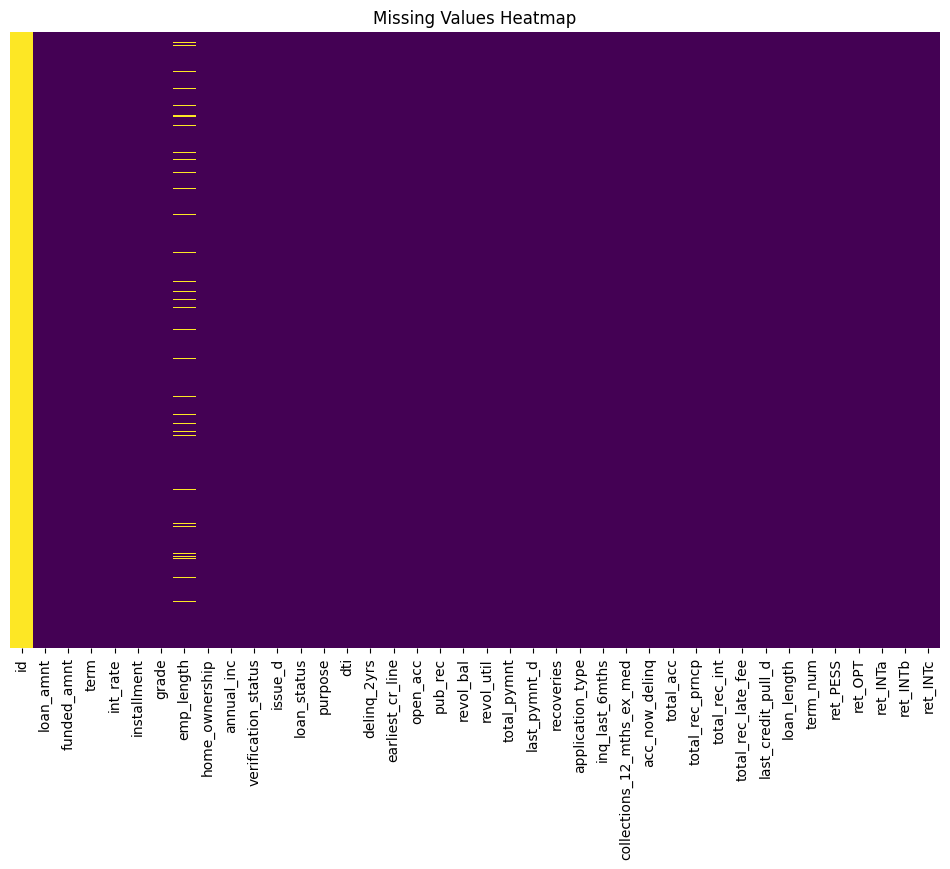

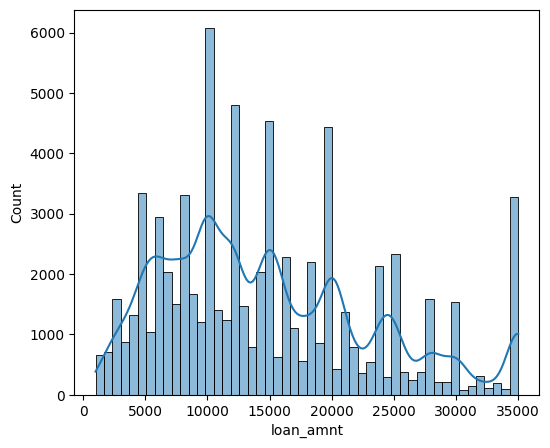

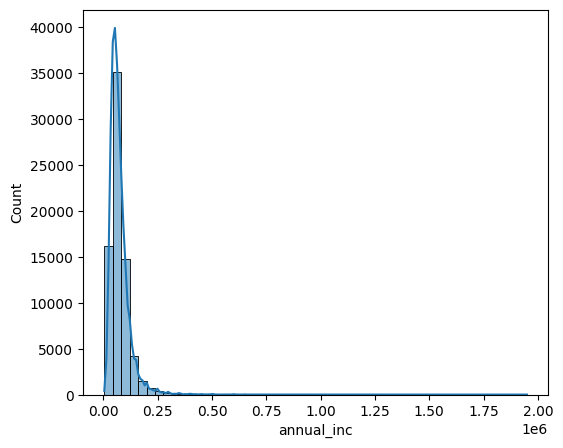

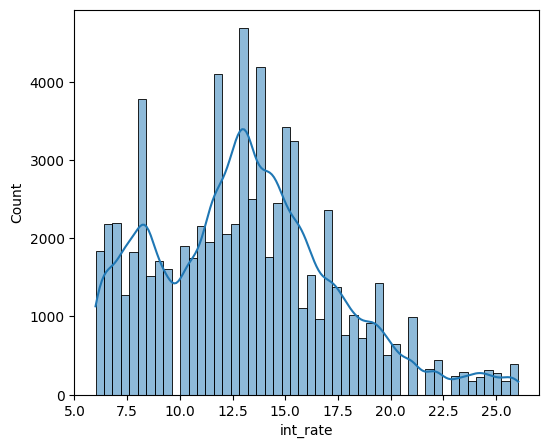

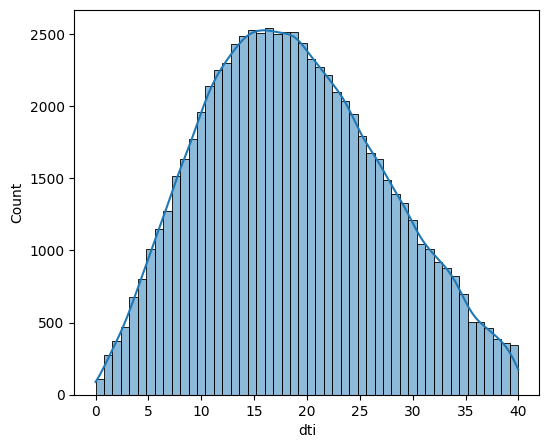

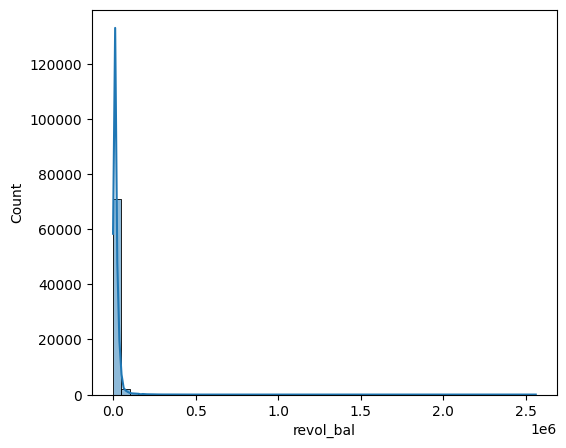

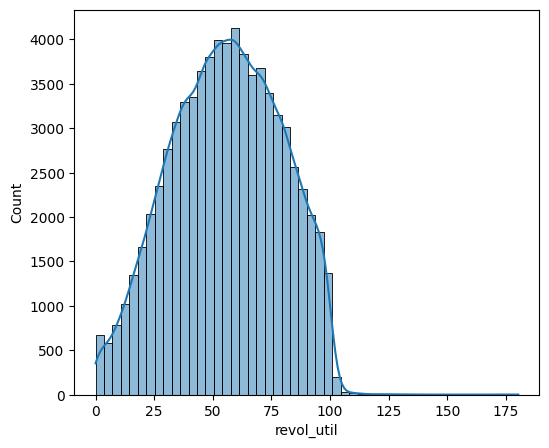

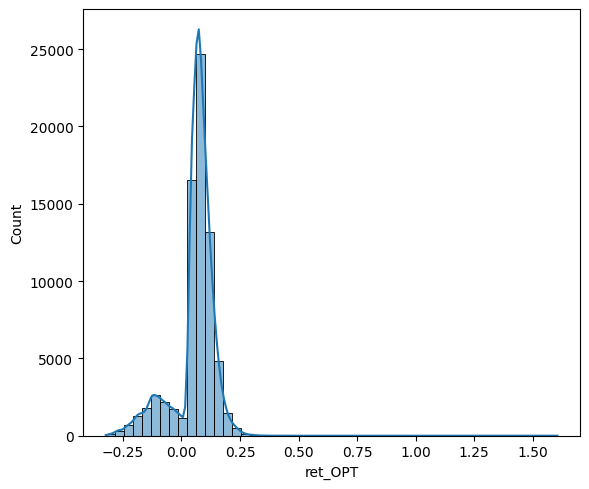

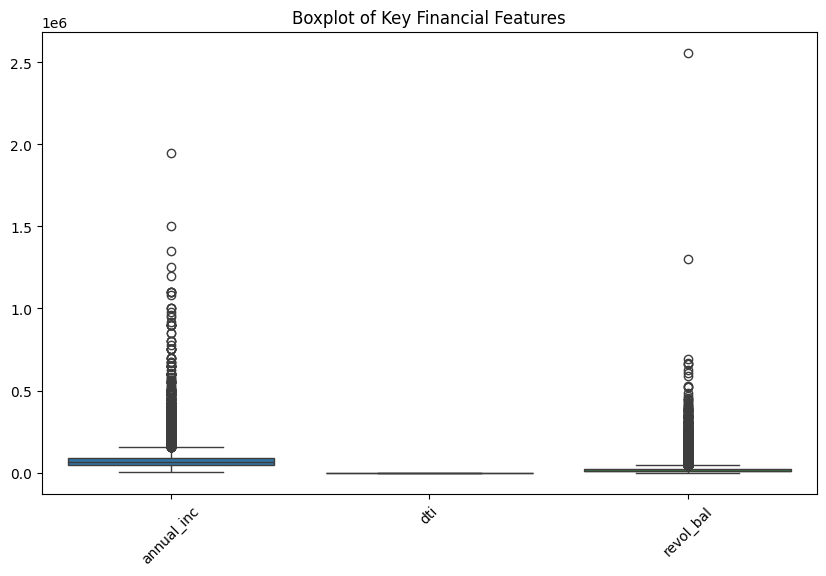

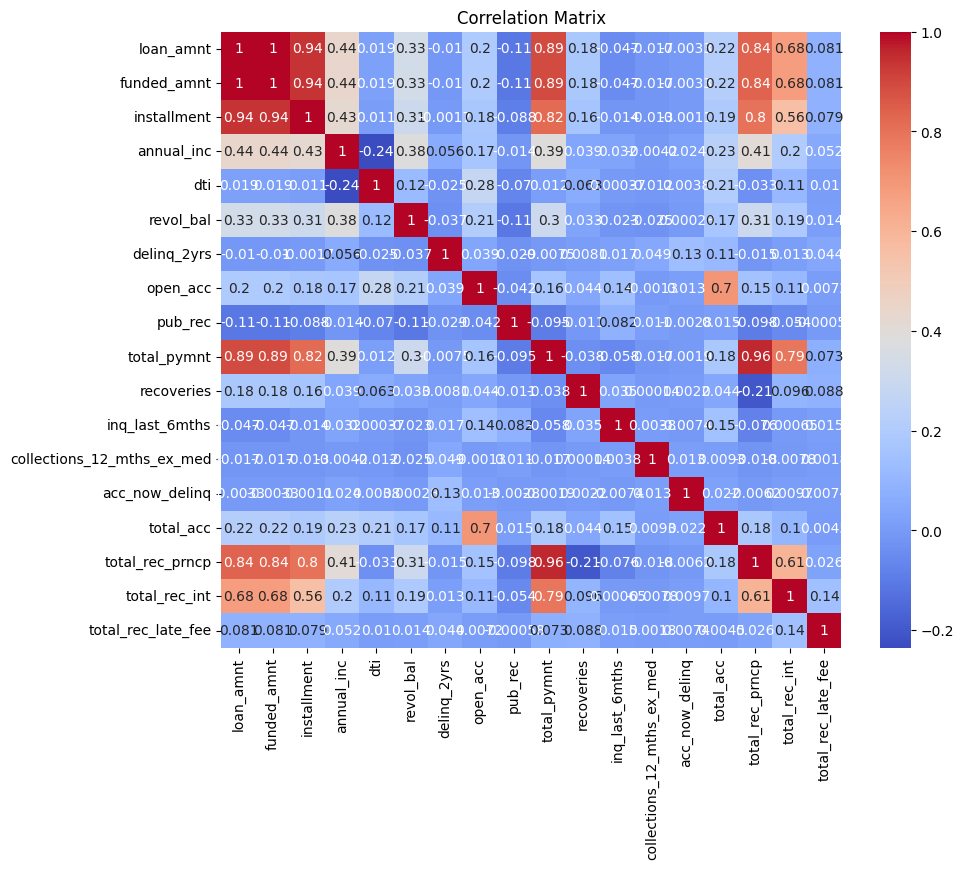

In [19]:
#Question 3
plt.figure(figsize=(12, 8))
sns.heatmap(final_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Plot distributions
num_vars = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal','revol_util','ret_OPT']
# final_data[num_vars].hist(bins=50, figsize=(12, 8),kde=True)
# plt.tight_layout()
# plt.show()
for col in num_vars:
    plt.figure(figsize=(6,5))
    sns.histplot(final_data[col], bins=50, kde=True)
plt.tight_layout()
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data[['annual_inc', 'dti', 'revol_bal']])
plt.title("Boxplot of Key Financial Features")
plt.xticks(rotation=45)
plt.show()

#Multiple variable summary
# Correlation matrix for numeric data
corr = final_data[float_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
#Data Cleaning
final_data['emp_length'].fillna(final_data['emp_length'].mode()[0], inplace=True)
# Fill missing numeric data with median
for col in float_cols:
    final_data[col].fillna(final_data[col].median(), inplace=True)

# Fill missing categorical data with "Unknown"
for col in cat_cols:
    final_data[col].fillna("Unknown", inplace=True)

# Fix percentage values
for col in perc_cols:
    final_data[col] = final_data[col] / 100 if final_data[col].max() > 1 else final_data[col]

# Remove or cap outliers using 1.5 * IQR rule
for col in float_cols:
    Q1 = final_data[col].quantile(0.25)
    Q3 = final_data[col].quantile(0.75)
    IQR = Q3 - Q1
    final_data[col] = final_data[col].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Fix incorrect types in date columns
for col in date_cols:
    final_data[col] = pd.to_datetime(final_data[col], errors='coerce')

<ipython-input-20-21e3fa39d0af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['emp_length'].fillna(final_data['emp_length'].mode()[0], inplace=True)
<ipython-input-20-21e3fa39d0af>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

# **Question 4**



*   Higher loan amounts and interest rates → Higher ROI
*   Higher interest rates + lower income → Higher default rate
*   Moderate interest rates + low default rates → Higher Sharpe Ratio
*   Higher grades → Lower default rates + more consistent returns
*   Short-term loans → Lower default rate but lower return
*   Higher recovery rates → Lower net losses + higher ROI

# **Question 6**

1. Optimistic Return (ret_OPT)
This assumes the loan is fully repaid and that the investor can reinvest any repaid capital immediately. It reflects maximum potential gain, adjusted for the actual time the loan was active.

- The distribution is highly right-skewed, centered around 5–10% annualized return

- A small number of loans show extreme returns above 1.0 (100%), likely from early repayments or short-term high-yield loans

2. Pessimistic Return (ret_PESS)
This assumes the loan runs for its entire term (e.g., 36 or 60 months), without reinvestment. It is a conservative estimate of long-term return under full duration.

- Most loans cluster around 5–10%, with a long tail of losses

- The distribution has a clear left tail, capturing loans with negative returns (defaults)

- This is the most stable and risk-aware return metric

3. Intermediate Returns (ret_INTa, ret_INTb, ret_INTc)
These simulate reinvesting monthly repayments at fixed interest rates:

- ret_INTa at 0.1%

- ret_INTb at 0.25%

- ret_INTc at 0.5%

This shows that each shows a progressively right-shifted distribution as the reinvestment rate increases. Also, ret_INTc achieves the highest peak returns (most loans ~10%), with tighter spread

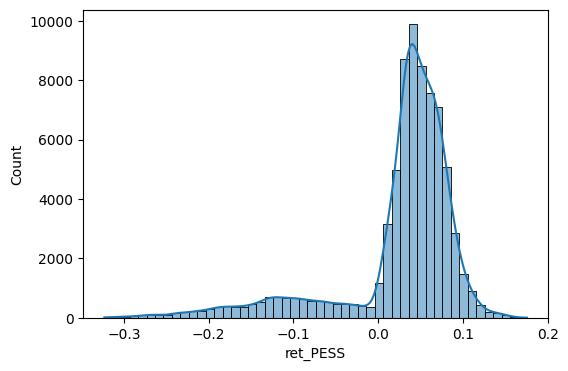

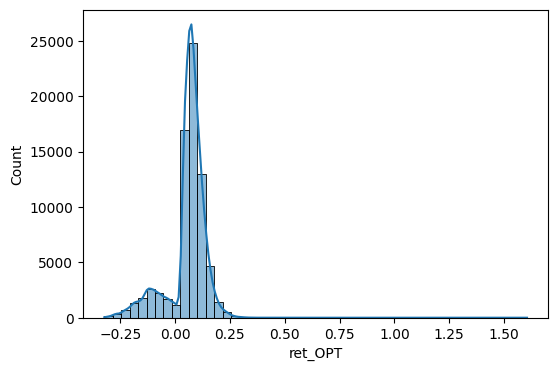

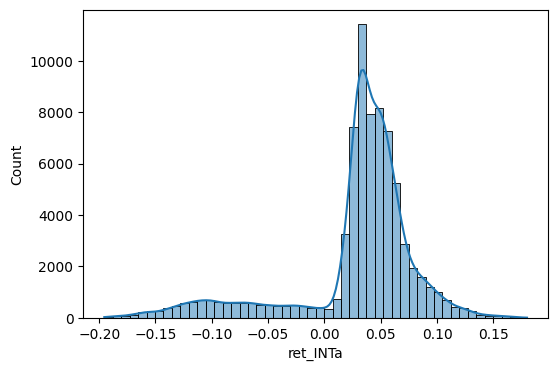

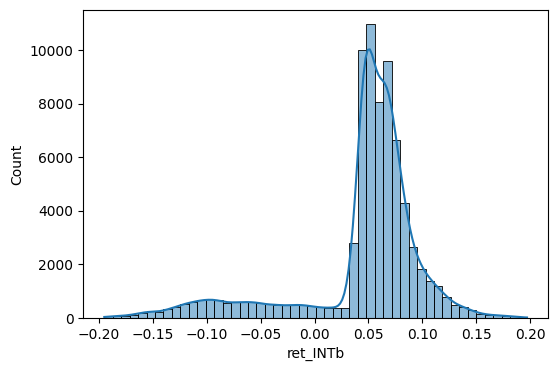

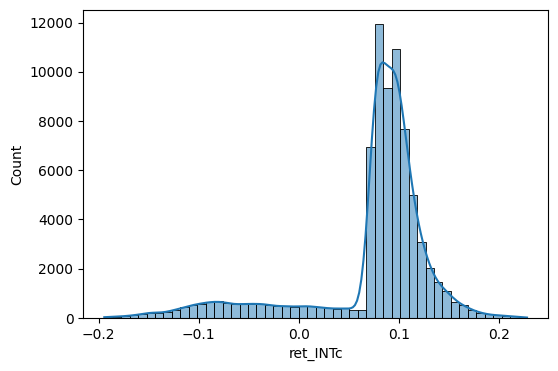

In [21]:
#Method 2
final_data['ret_PESS'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['term_num'])


#Method 1
final_data['ret_OPT'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['loan_length'])
final_data.loc[final_data.ret_OPT < 0,'ret_OPT'] = final_data.ret_PESS[final_data.ret_OPT < 0]


#Method 3
final_data['ret_INTa'] = ret_method_3(5*12, 0.001)
final_data['ret_INTb'] = ret_method_3(5*12, 0.0025)
final_data['ret_INTc'] = ret_method_3(5*12, 0.005)

final_data.columns[-6:]

ret_cols = ['ret_PESS', 'ret_OPT', 'ret_INTa', 'ret_INTb', 'ret_INTc']

for col in ret_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(final_data[col], bins=50, kde=True)

# **Question 7**

In order toget a etter understanding of the loan distribution, we did a distribution, which shows that loans with a grace of B or C has the most count. In the default rate by grade graph, it shows that Grade A has the lowest default rate (~5.4%), while Grade G reaches a high of ~43.5%, which gives us a better understanding of the loan grades.

Across all return metrics (`ret_OPT`, `ret_PESS`, `ret_INTa`), Grades A–C show lower but more stable returns with narrower interquartile ranges and fewer extreme values. Grades D–G show higher potential returns, but also higher volatility and more frequent losses. This validates the classic risk-return tradeoff — safer loans yield less but are more predictable, while riskier grades may offer higher returns at the cost of stability.


Lastly, the correlation Matrix shows that grade_num has

- Strong positive correlation with int_rate (0.97)

- Mild negative correlation with annual_inc (–0.11)

- Mild positive correlation with revol_util and dti — indicating higher credit usage and debt burden in lower grades.

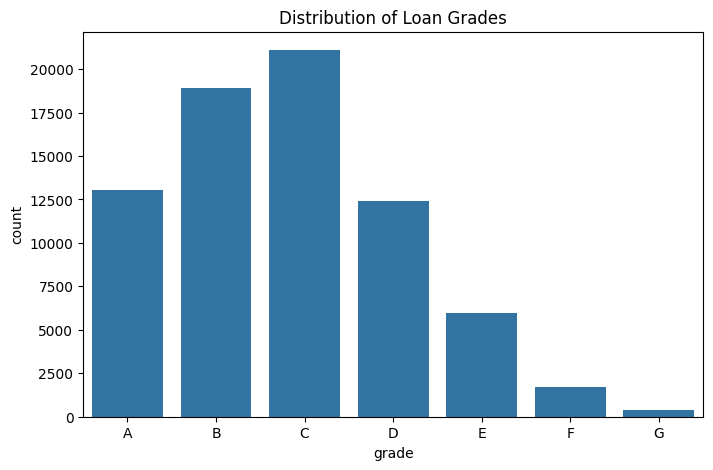

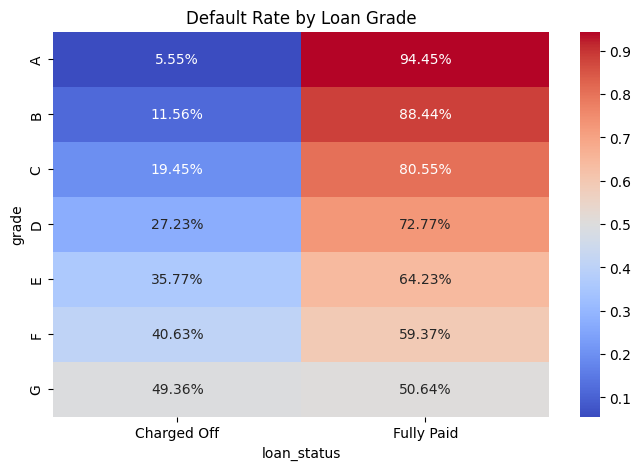

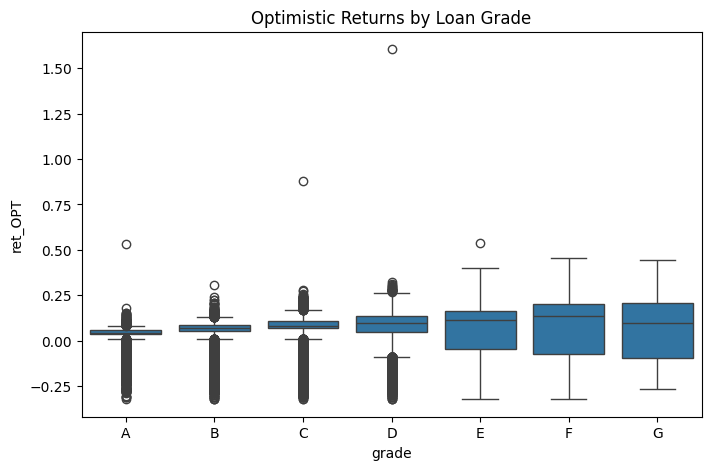

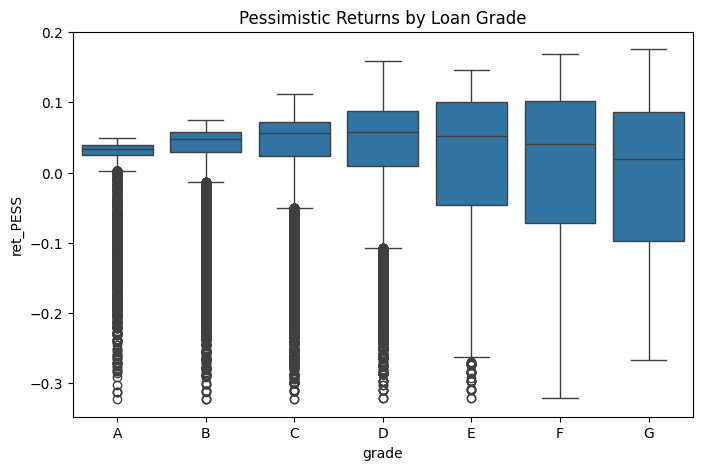

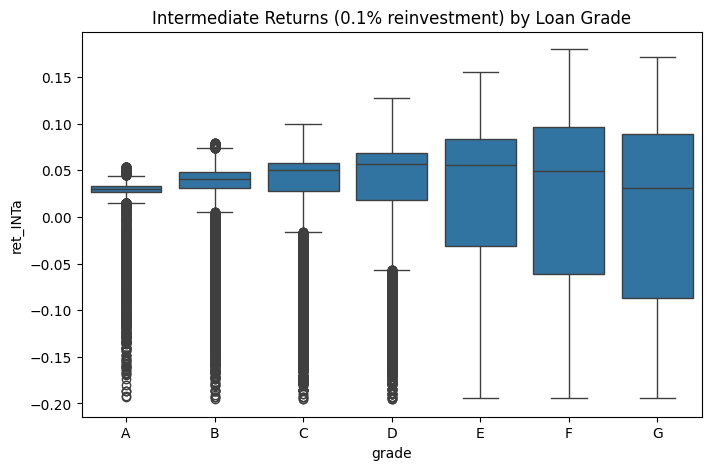

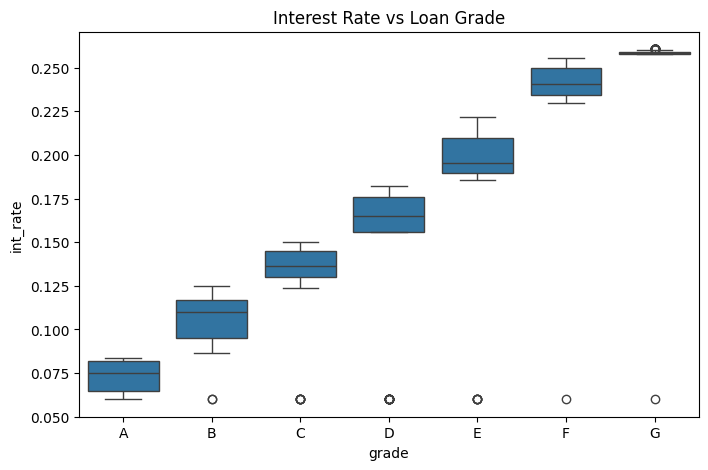

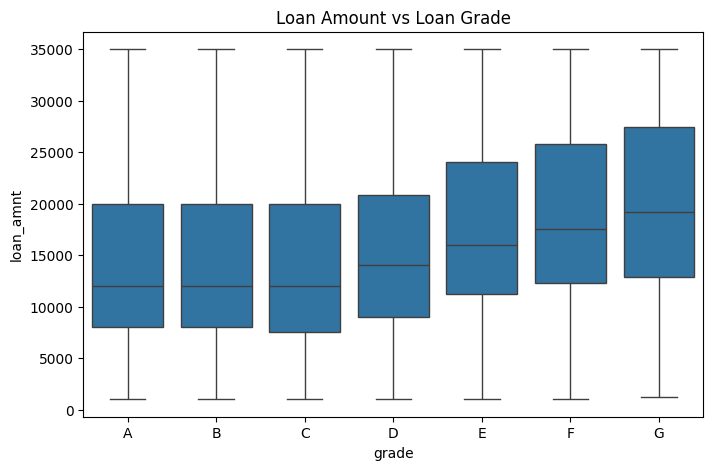

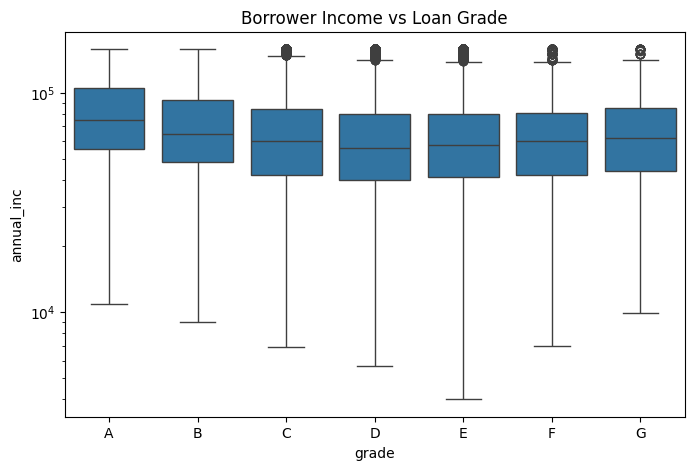

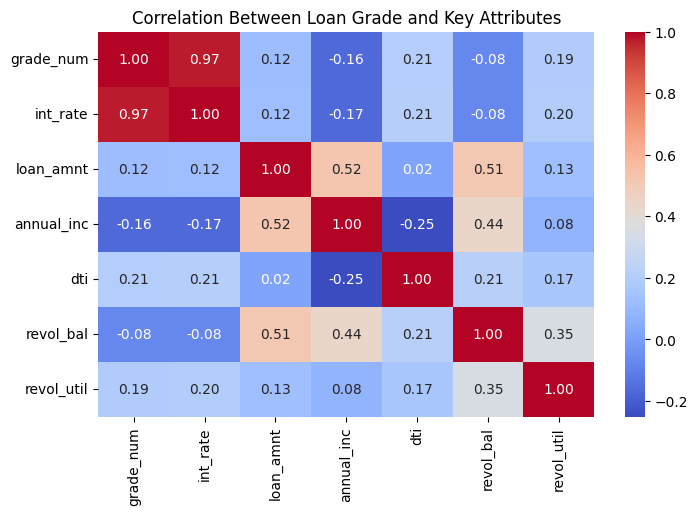

In [22]:
# 1. Distribution of Loan Grades
plt.figure(figsize=(8, 5))
sns.countplot(x='grade', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Distribution of Loan Grades")
plt.show()

# 2. Default Rate by Loan Grade
grade_default_rate = final_data.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(8, 5))
sns.heatmap(grade_default_rate, annot=True, cmap='coolwarm', fmt=".2%")
plt.title("Default Rate by Loan Grade")
plt.show()

# 3. Returns by Loan Grade (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='ret_OPT', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Optimistic Returns by Loan Grade")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='ret_PESS', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Pessimistic Returns by Loan Grade")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='ret_INTa', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Intermediate Returns (0.1% reinvestment) by Loan Grade")
plt.show()

# 4. Interest Rate vs. Loan Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='int_rate', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Interest Rate vs Loan Grade")
plt.show()

# 5. Loan Amount vs. Loan Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='loan_amnt', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Loan Amount vs Loan Grade")
plt.show()

# 6. Borrower Income vs. Loan Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x='grade', y='annual_inc', data=final_data, order=sorted(final_data['grade'].unique()))
plt.title("Borrower Income vs Loan Grade")
plt.yscale('log')  # Log scale for better visualization of income distribution
plt.show()

# 7. Correlation of Loan Grade with Other Variables
# Convert categorical 'grade' to numerical for correlation analysis
final_data['grade_num'] = final_data['grade'].astype('category').cat.codes

corr_matrix = final_data[['grade_num', 'int_rate', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal','revol_util']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Loan Grade and Key Attributes")
plt.show()

# **Question 8**

We choose k=7 becasue we pick it based on the 7 loan grades (A-G), which are 7 clusters. In addition, based on elbow plot, we observe a distinct 'elbow' or inflection point around k=7, where the rate of improvement in inertia begins to slow down significantly. This suggests that moving from k=1 to k=7 offers large gains in compactness and separation of clusters. Beyond k=7, the marginal improvement diminishes — adding more clusters results in overfitting and less interpretable groupings. Therefore, k=7 is the optimal balance between minimizing intra-cluster variance and maintaining meaningful, interpretable segments in the loan data.

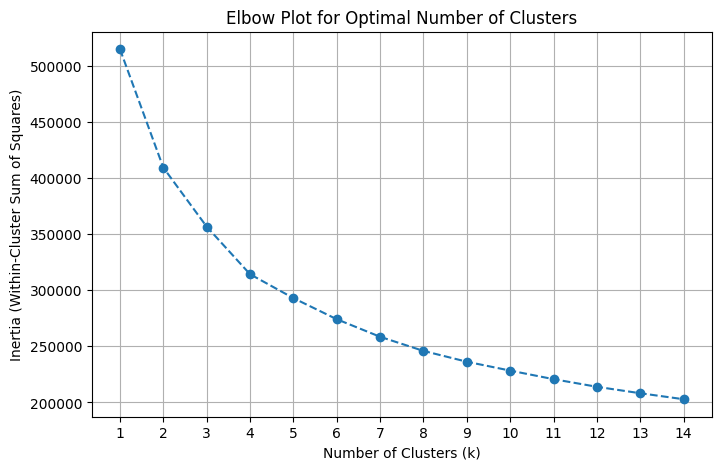


Cross-tabulation between Clusters and Grades:

grade       A     B     C     D     E     F    G
cluster                                         
0.0         0     6   616  2406  2697  1068  248
1.0       617  2605  4817  3010   863    56    1
2.0      3506  2803  1642   472    84     5    1
3.0      1745  4185  4777  1567   137     0    0
4.0       268  1026  2478  2237  1466   489  131
5.0      2005  3282  3152  1554   593    93   12
6.0      4927  4980  3612  1137   126     2    0


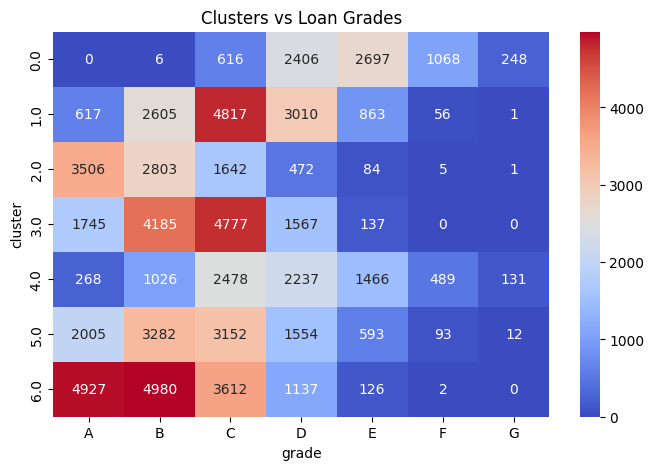

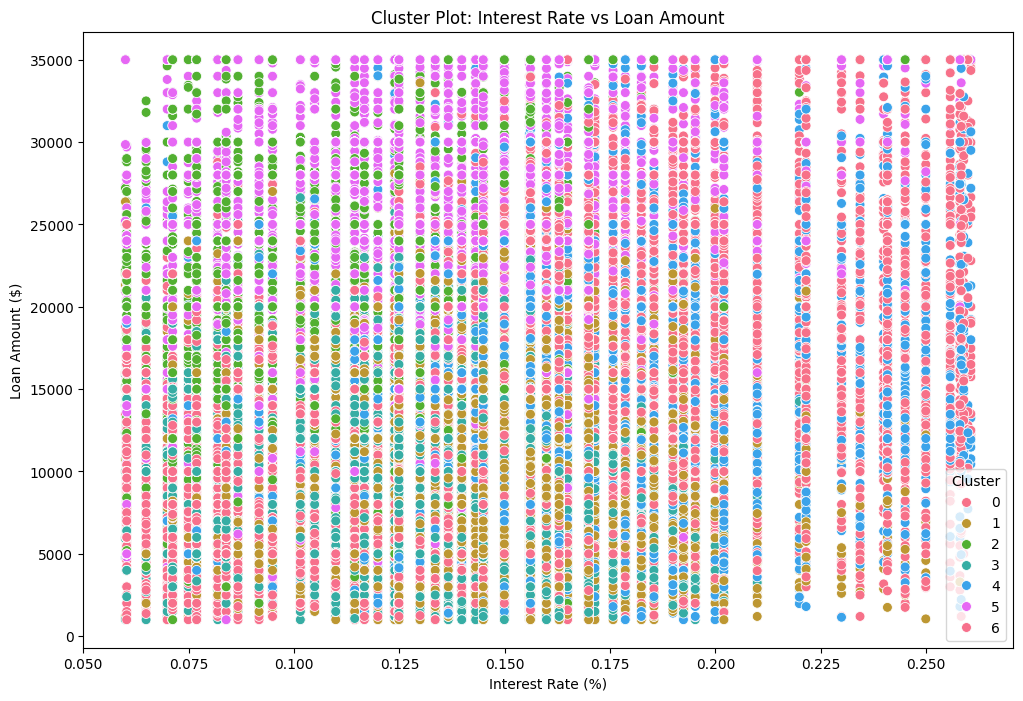

In [23]:
# Select numerical features for clustering
cluster_features = final_data[['int_rate', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'ret_OPT']]

# Remove rows with missing values
cluster_data = cluster_features.dropna()

# Standardize the data to equalize scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


# Define range of k values to test
k_values = range(1, 15)
inertia = []

# Fit KMeans for different values of k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Set number of clusters equal to the number of loan grades (7 clusters for A to G)
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster membership back to the original dataset
final_data.loc[cluster_data.index, 'cluster'] = cluster_data['cluster']

# Cross-tabulation of clusters and grades
cross_tab = pd.crosstab(final_data['cluster'], final_data['grade'])
print("\nCross-tabulation between Clusters and Grades:\n")
print(cross_tab)

# Heatmap of cross-tabulation
plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Clusters vs Loan Grades')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=cluster_data['int_rate'],
    y=cluster_data['loan_amnt'],
    hue=cluster_data['cluster'],
    palette='husl',
    s=50
)
plt.title('Cluster Plot: Interest Rate vs Loan Amount')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Cluster')
plt.show()

# **Question 9**

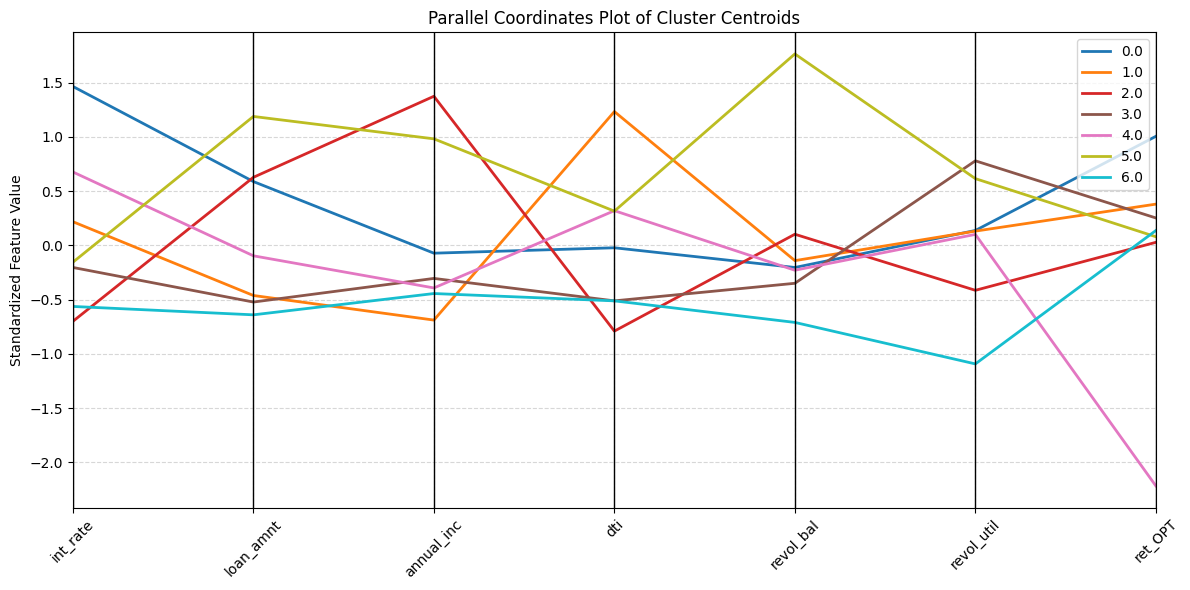

In [24]:
# Define clustering features
cluster_features = ['int_rate', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'ret_OPT']

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=cluster_features)

# Add cluster labels to the scaled data
scaled_df['cluster'] = final_data['cluster'].values

# Compute the cluster centroids (mean of each feature for each cluster)
centroid_df = scaled_df.groupby('cluster')[cluster_features].mean().reset_index()

# Plot parallel coordinates using centroids only
plt.figure(figsize=(12, 6))
parallel_coordinates(centroid_df, 'cluster', colormap='tab10', linewidth=2)
plt.title("Parallel Coordinates Plot of Cluster Centroids")
plt.ylabel("Standardized Feature Value")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

| Grade | Cluster | Risk Level | Strategy | Characteristics |
|-------|---------|------------|----------|-----------------|
| A     | Cluster 0 | Low        | Focus on low-risk, stable returns | Low interest rates, high income, low DTI, stable repayment |
| B     | Cluster 3 | Low        | Moderate returns, low variance     | High income, low revol_util, low interest rates |
| C     | Cluster 4 | Moderate   | Consistent repayment, balanced returns | Moderate loan size, moderate income, stable repayment |
| D     | Cluster 1 | High        | High-risk, high-return strategy    | High interest rates, high DTI, high revol_util, high risk |
| E     | Cluster 2 | High        | Hedge exposure or diversify         | High DTI, low income, low repayment consistency |
| F     | Cluster 5 | High        | Diversified strategy               | High income, high loan amounts, inconsistent repayment |
| G     | Cluster 6 | Very High   | Hedge or avoid exposure            | Irregular repayment patterns, extreme revol_util |

# **Question 10**

We applied Principal Component Analysis (PCA) on the same standardized numerical variables used for clustering, to uncover dominant directions of variance and reduce dimensionality.

The first 2 principal components (PC1 + PC2) explain over 50% of the variance. The first 5 components explain nearly 90%, indicating that much of the dataset’s variability can be retained in fewer dimensions.

The heatmap shows how each variable contributes to each principal component. The first principal component (PC1) is strongly influenced by loan amount, annual income, and revolving balance, representing an overall financial scale or borrower size dimension. PC2 is dominated by interest rate, debt-to-income ratio (DTI), and revolving credit utilization (revol_util), capturing the borrower's risk profile, particularly in terms of cost of borrowing and leverage. PC3 is primarily driven by ret_OPT (the optimistic return metric), reflecting the investment return potential of a loan, relatively independent of creditworthiness. Meanwhile, PC5 and PC7 are heavily shaped by revol_bal and revol_util, highlighting credit usage behavior patterns among borrowers.

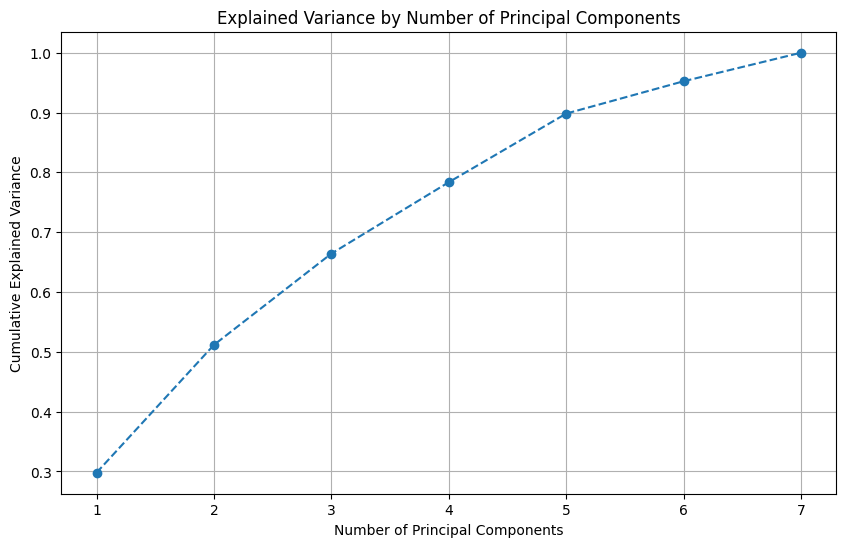


PCA Loadings:

     int_rate  loan_amnt  annual_inc       dti  revol_bal  revol_util  \
PC1  0.007488   0.558259    0.513250  0.051142   0.578167    0.295799   
PC2  0.546049  -0.037556   -0.379515  0.604524   0.093892    0.423853   
PC3  0.392525   0.121717    0.093682 -0.288599  -0.182605   -0.057257   
PC4  0.639345   0.334325    0.104260 -0.272293  -0.283659   -0.187562   
PC5  0.014140  -0.295643    0.031820 -0.533163  -0.089452    0.778068   
PC6  0.164225  -0.494325    0.752782  0.339872  -0.214040   -0.016322   
PC7  0.334314  -0.478108   -0.072135 -0.273361   0.699489   -0.297889   

      ret_OPT  
PC1  0.021837  
PC2  0.049714  
PC3  0.838105  
PC4 -0.528024  
PC5 -0.117170  
PC6 -0.019985  
PC7 -0.041156  


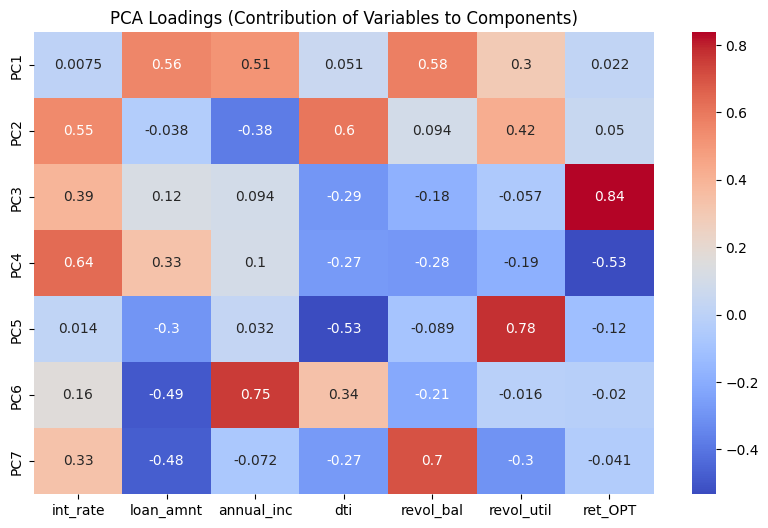

In [25]:
# 1. Select the finalized features
pca_features = final_data[['int_rate', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'ret_OPT']]

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_features)

# 3. Perform PCA
pca = PCA(n_components=7)
principal_components = pca.fit_transform(scaled_data)

# 4. Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 5. Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 6. PCA Loadings
loadings = pd.DataFrame(pca.components_, columns=pca_features.columns, index=[f'PC{i+1}' for i in range(pca.n_components)])
print("\nPCA Loadings:\n")
print(loadings)

# 7. Heatmap of PCA Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True)
plt.title('PCA Loadings (Contribution of Variables to Components)')
plt.show()

# **(Optional) Question 11**

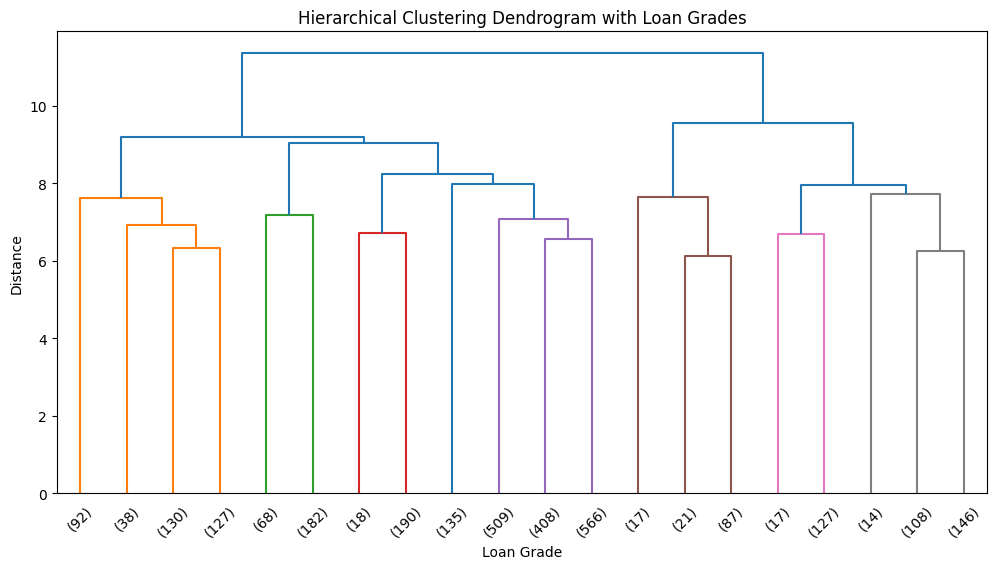

Cluster Sizes:
cluster
5    1483
7     412
1     387
2     250
3     208
4     135
6     125
Name: count, dtype: int64

Sample Cluster Assignments:
      grade  int_rate  loan_amnt  cluster
16769     C    0.1499    24125.0        3
1091      C    0.1239     6000.0        2
4417      D    0.1649    12000.0        5
72828     D    0.1757    15000.0        5
25761     B    0.1144    10000.0        5
64146     B    0.1167    28000.0        1
51229     C    0.1398     2500.0        5
31642     E    0.1999    27000.0        7
37072     C    0.1449    31000.0        2
28871     C    0.1239    20000.0        5


In [26]:
cluster_features_Hiera = final_data[['grade', 'int_rate', 'loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'ret_OPT']]
cluster_data_2 = cluster_features_Hiera.dropna()

# Reduce dataset size to avoid crashes
cluster_data_2 = cluster_data_2.sample(n=min(3000, len(cluster_data_2)), random_state=42)

# Encode loan grades into numeric form for clustering
le = LabelEncoder()
cluster_data_2['grade_encoded'] = le.fit_transform(cluster_data_2['grade'])

# Standardize the numerical data
scaler = StandardScaler()
scaled_data_2 = scaler.fit_transform(cluster_data_2.drop(['grade', 'grade_encoded'], axis=1))

# Add the encoded grade to the scaled data
scaled_data_with_grade = np.hstack([scaled_data_2, cluster_data_2['grade_encoded'].values.reshape(-1, 1)])

linked = linkage(scaled_data_with_grade, method='complete')
grade_labels = cluster_data_2['grade'].values

# Truncate dendrogram to avoid overload
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=grade_labels,    # Use loan grades as labels
    leaf_rotation=45,
    leaf_font_size=10,
    truncate_mode='lastp',  # Truncate for better clarity
    p=20,                   # Show last 20 merged clusters
    color_threshold=0.7 * max(linked[:, 2])  # Color clusters
)
plt.title('Hierarchical Clustering Dendrogram with Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram at a certain threshold to form clusters
num_clusters = 7
cluster_data_2['cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Display cluster counts
print("Cluster Sizes:")
print(cluster_data_2['cluster'].value_counts())

# Preview cluster assignments
print("\nSample Cluster Assignments:")
print(cluster_data_2[['grade', 'int_rate', 'loan_amnt', 'cluster']].head(10))

## **K-Means Clustering**
Clusters are well-separated, business-relevant, and tied to clear financial strategies. This clustering is better for **portfolio strategy** and **risk-based pricing**.  

## **Hierarchical Clustering**

| **Hierarchical Cluster** | **Interpretation** |
|-------------------------|--------------------|
| **Orange Cluster** | High-grade loans (A, B) – lower risk, lower interest rates |
| **Green Cluster** | Mixed-grade loans (B, C, D) – moderate risk, moderate interest rates |
| **Red Cluster** | Low-grade loans (E, F) – higher risk, higher interest rates |
| **Purple Cluster** | Mixed loans (C, D) – diverse risk profile |
| **Brown Cluster** | Low-grade loans (F, G) – high risk, potential default loans |

Hierarchical clustering creates more granular clusters
- High-risk loans (E, F, G) are split into multiple branches which means more repayment pattern variability.  
- More overlap within similar grades, implies Finer separation but less business clarity.  

This clustering is better for understanding **repayment variability** and **risk differentiation**.  

# **(Optional) Question 12**


Running PCA for Grade: C


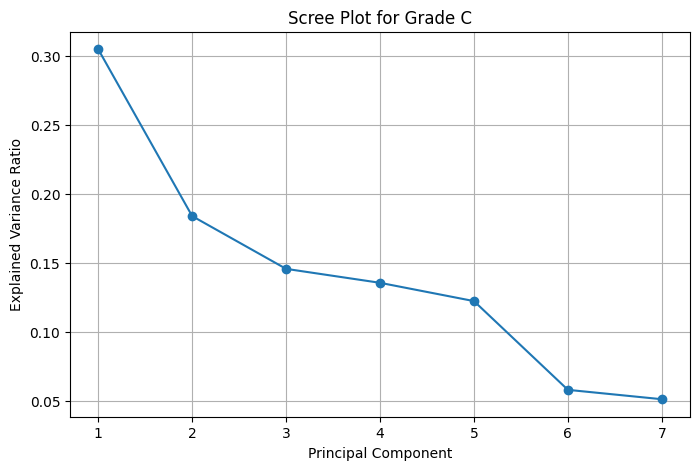

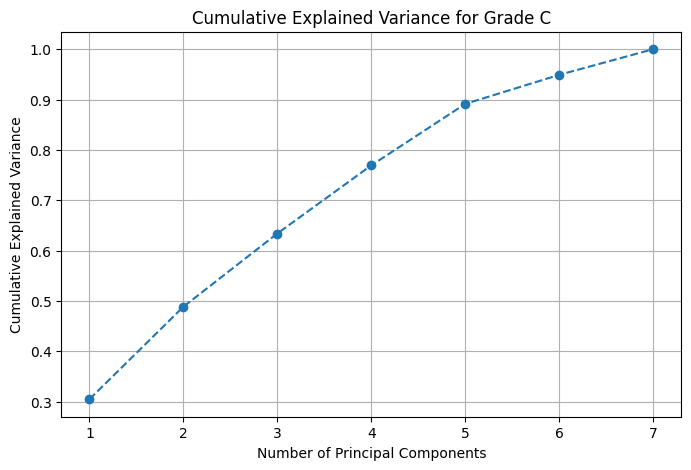


Loadings for Grade C:
                 PC1       PC2       PC3
int_rate   -0.004885  0.214735  0.757800
loan_amnt   0.550526 -0.150246  0.017561
annual_inc  0.527189 -0.355354 -0.004543
dti         0.037509  0.723852  0.039707
revol_bal   0.572088  0.235140 -0.030065
revol_util  0.297829  0.401325 -0.045680
ret_OPT     0.039684 -0.254410  0.648724

Running PCA for Grade: A


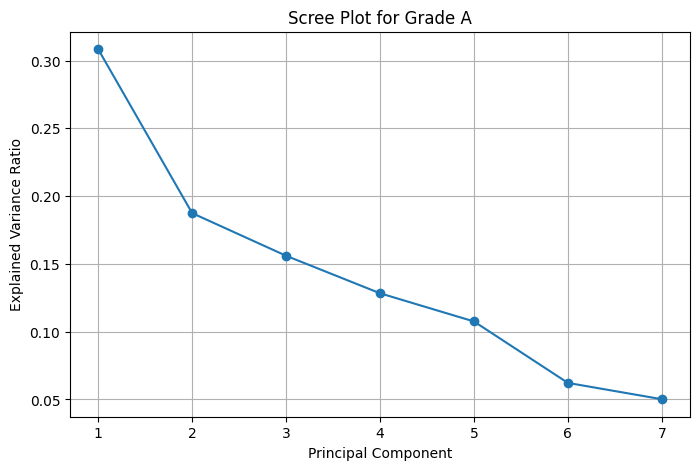

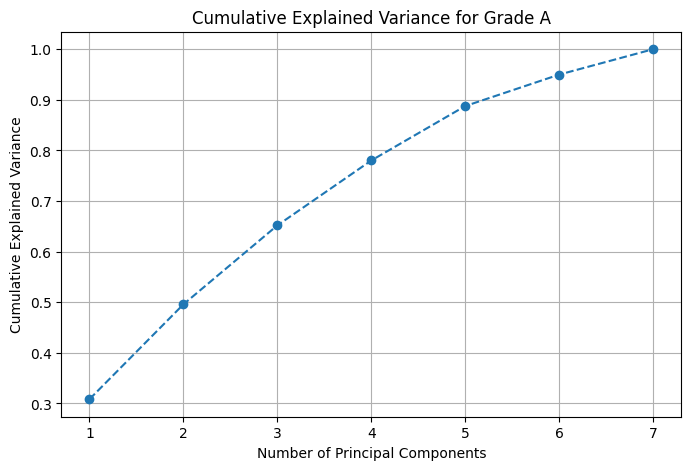


Loadings for Grade A:
                 PC1       PC2       PC3
int_rate    0.035959  0.439139  0.585979
loan_amnt   0.539402 -0.136754  0.014482
annual_inc  0.488858 -0.418263  0.075158
dti         0.085711  0.648351 -0.289814
revol_bal   0.583085  0.104436 -0.123455
revol_util  0.348470  0.419425  0.084819
ret_OPT     0.002227 -0.079549  0.737796

Running PCA for Grade: D


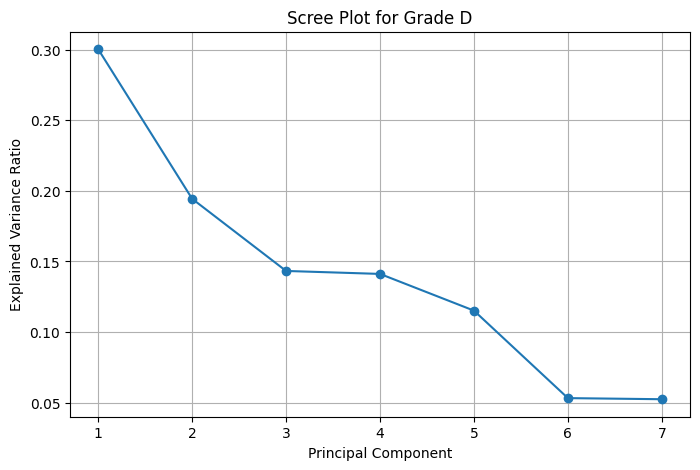

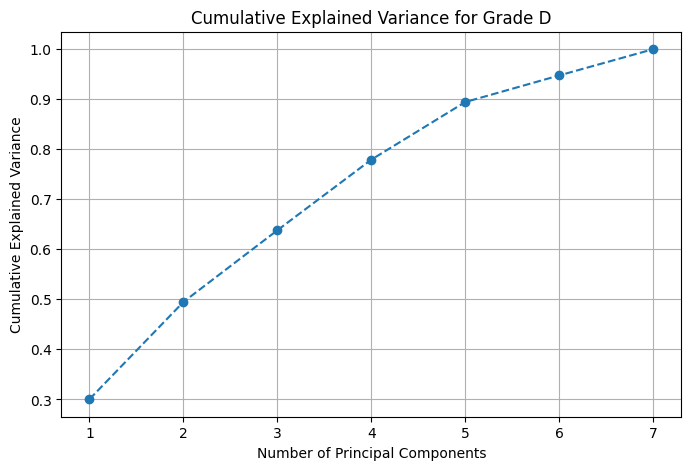


Loadings for Grade D:
                 PC1       PC2       PC3
int_rate    0.069798  0.038310  0.907519
loan_amnt   0.568540 -0.184351  0.007936
annual_inc  0.508589 -0.421184 -0.073063
dti         0.054409  0.705851  0.059805
revol_bal   0.562364  0.267187 -0.050395
revol_util  0.306167  0.427200 -0.040242
ret_OPT     0.016610 -0.187181  0.404070

Running PCA for Grade: B


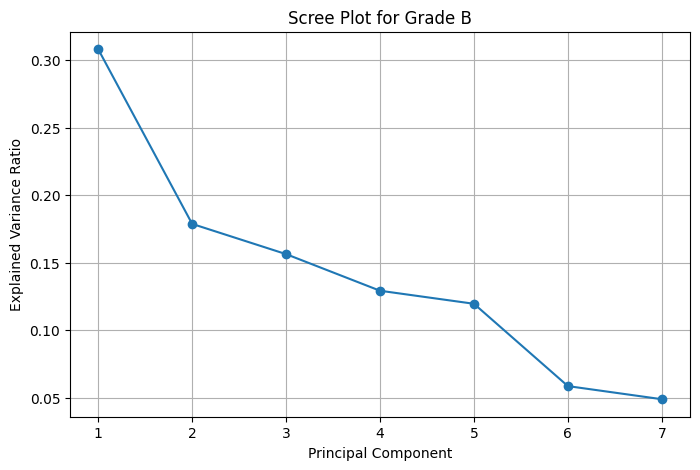

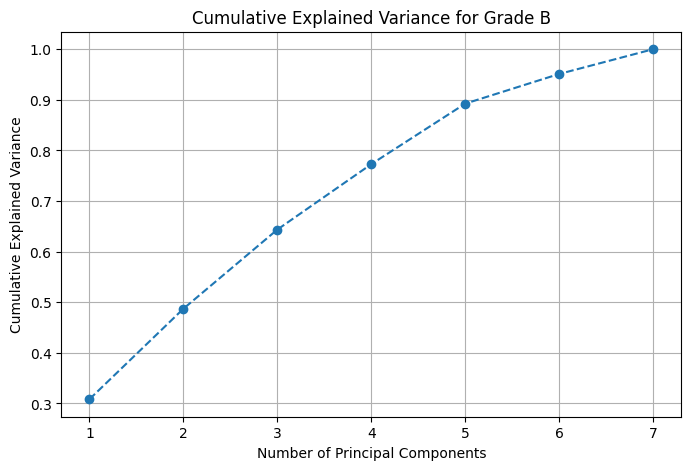


Loadings for Grade B:
                 PC1       PC2       PC3
int_rate   -0.048104  0.334595  0.644011
loan_amnt   0.547653 -0.141257 -0.007727
annual_inc  0.518781 -0.361942  0.079866
dti         0.063652  0.717047 -0.199639
revol_bal   0.580090  0.198308 -0.073342
revol_util  0.296309  0.413170  0.125270
ret_OPT     0.016552 -0.113570  0.719642

Running PCA for Grade: E


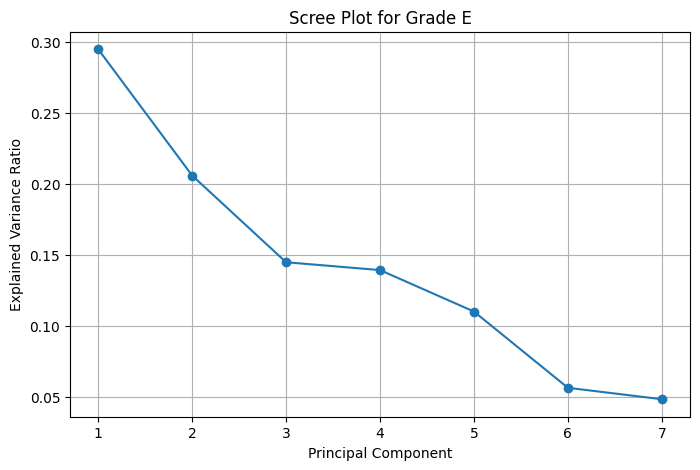

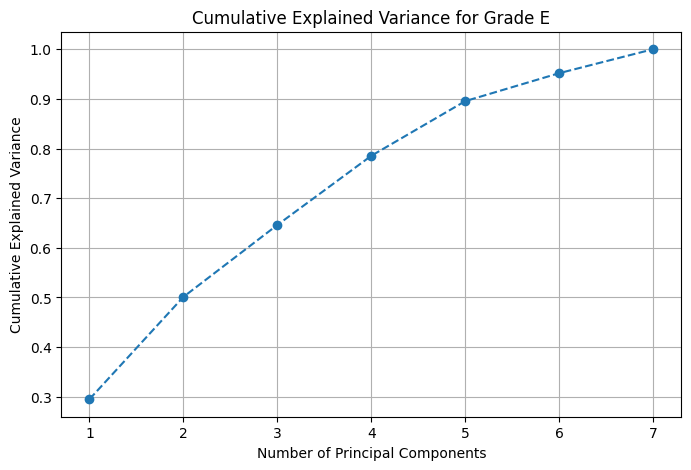


Loadings for Grade E:
                 PC1       PC2       PC3
int_rate    0.045919  0.054684  0.831381
loan_amnt   0.579511 -0.200788 -0.020325
annual_inc  0.516668 -0.411058 -0.083510
dti         0.042562  0.670499  0.033995
revol_bal   0.545068  0.308679 -0.031718
revol_util  0.307569  0.447668  0.034911
ret_OPT     0.040030 -0.206077  0.545929

Running PCA for Grade: F


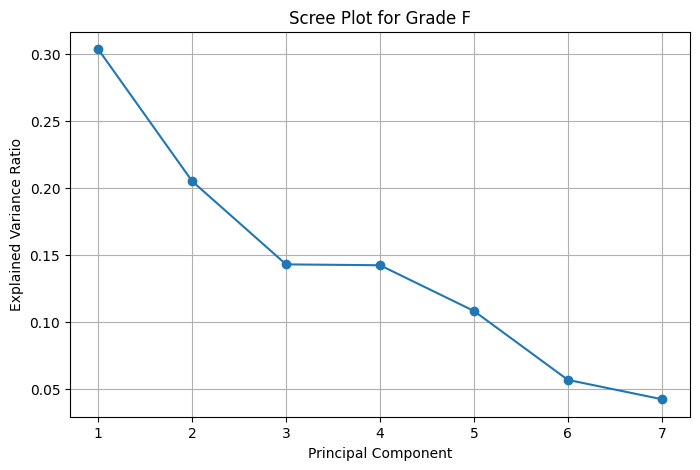

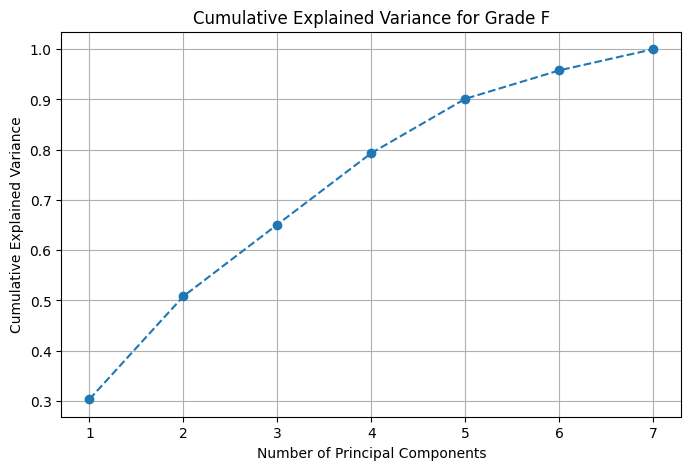


Loadings for Grade F:
                 PC1       PC2       PC3
int_rate   -0.047651 -0.085225  0.906039
loan_amnt   0.588813 -0.143474  0.057088
annual_inc  0.554771 -0.335593  0.017080
dti        -0.075923  0.669143  0.006577
revol_bal   0.518477  0.356778 -0.022772
revol_util  0.262054  0.504122  0.044446
ret_OPT    -0.001784 -0.174202 -0.415939

Running PCA for Grade: G


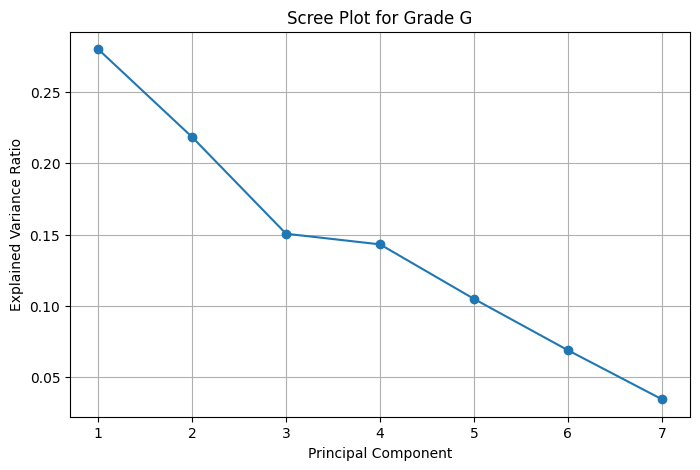

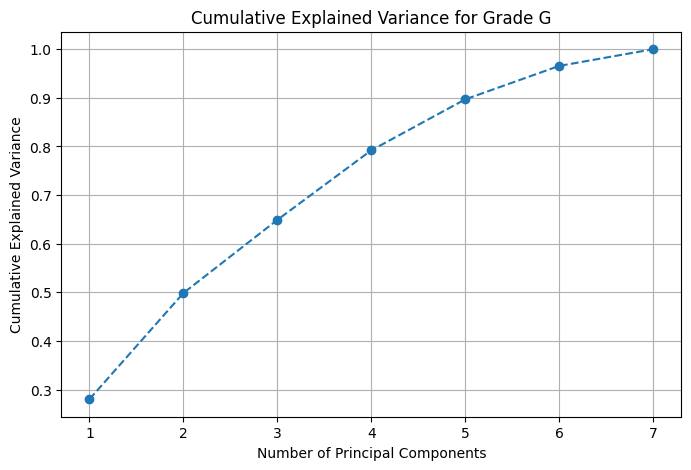


Loadings for Grade G:
                 PC1       PC2       PC3
int_rate   -0.014750 -0.074468 -0.070749
loan_amnt   0.643309 -0.022419 -0.133078
annual_inc  0.641387 -0.167233 -0.013268
dti        -0.167899  0.578929 -0.246289
revol_bal   0.381270  0.522552  0.143302
revol_util  0.029017  0.584808  0.291225
ret_OPT    -0.012616 -0.125560  0.900613


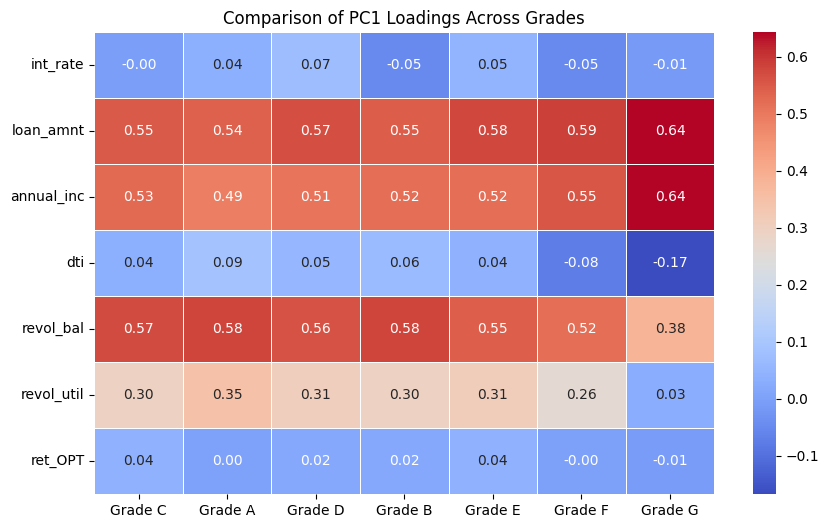


Comparison of PC1 Loadings Across Grades:
             Grade C   Grade A   Grade D   Grade B   Grade E   Grade F  \
int_rate   -0.004885  0.035959  0.069798 -0.048104  0.045919 -0.047651   
loan_amnt   0.550526  0.539402  0.568540  0.547653  0.579511  0.588813   
annual_inc  0.527189  0.488858  0.508589  0.518781  0.516668  0.554771   
dti         0.037509  0.085711  0.054409  0.063652  0.042562 -0.075923   
revol_bal   0.572088  0.583085  0.562364  0.580090  0.545068  0.518477   
revol_util  0.297829  0.348470  0.306167  0.296309  0.307569  0.262054   
ret_OPT     0.039684  0.002227  0.016610  0.016552  0.040030 -0.001784   

             Grade G  
int_rate   -0.014750  
loan_amnt   0.643309  
annual_inc  0.641387  
dti        -0.167899  
revol_bal   0.381270  
revol_util  0.029017  
ret_OPT    -0.012616  


In [27]:
# PCA by Loan Grade
comparison_df = pd.DataFrame(index=pca_features.columns)

grades = final_data['grade'].unique()

for grade in grades:
    print(f"\nRunning PCA for Grade: {grade}")

    # Filter data for the specific grade
    filtered_data = final_data[final_data['grade'] == grade].dropna(subset=pca_features.columns)

    if filtered_data.shape[0] > 1:  # Ensure enough data points for PCA
        X_scaled_grade = scaler.fit_transform(filtered_data[pca_features.columns])

        # Perform PCA
        pca_grade = PCA(n_components=len(pca_features.columns))
        pca_result_grade = pca_grade.fit_transform(X_scaled_grade)

        explained_variance_ratio_grade = pca_grade.explained_variance_ratio_
        cumulative_variance_ratio_grade = np.cumsum(explained_variance_ratio_grade)

        # Scree plot for individual grades
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(explained_variance_ratio_grade) + 1), explained_variance_ratio_grade, marker='o')
        plt.title(f'Scree Plot for Grade {grade}')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.grid()
        plt.show()

        # Cumulative variance plot for individual grades
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(cumulative_variance_ratio_grade) + 1), cumulative_variance_ratio_grade, marker='o', linestyle='--')
        plt.title(f'Cumulative Explained Variance for Grade {grade}')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid()
        plt.show()

        # PCA Loadings for each grade
        loadings_grade = pd.DataFrame(
            pca_grade.components_.T,
            columns=[f'PC{i + 1}' for i in range(pca_grade.n_components_)],
            index=pca_features.columns
        )
        print(f"\nLoadings for Grade {grade}:")
        print(loadings_grade.iloc[:, :3])

        # Add comparison of PC1 loadings between entire dataset and grade-specific PCA
        comparison_df[f'Grade {grade}'] = loadings_grade.iloc[:, 0]

# Side-by-Side Comparison of Loadings
# Plot the comparison using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Comparison of PC1 Loadings Across Grades')
plt.show()

# Final Insights
print("\nComparison of PC1 Loadings Across Grades:")
print(comparison_df)


The PCA analysis highlighted key differences in variance structure and feature influence across loan grades:

1. Explained Variance Differences
  - First two PCs explained ~40% of variance for most grades.
  - Higher variance in Grade A and B loans reflects more stable borrower behavior.
  - Greater variance in Grade G loans suggests higher repayment uncertainty.

2. Key Feature Drivers
  - Loan Amount and Annual Income – Strong loadings across all grades (~0.54–0.57), indicating consistent impact on variance.
  - Debt-to-Income Ratio – Higher influence in low-grade loans (up to 0.64), highlighting greater sensitivity to borrower leverage.
  - Ret_OPT – Stronger impact on Grade G loans (~0.93), reflecting higher unpredictability.

3. Investment Strategy
  - Focus on loan size and interest rate for consistent returns in Grade A and B loans.
  - Higher variance in low-grade loans suggests greater potential for high returns but higher risk.
  - Diversify across grades to balance stability and growth potential.

Higher-grade loans are more predictable and stable, while lower-grade loans are more influenced by borrower-specific financial behavior, presenting higher return potential but greater risk. A balanced strategy should combine both for optimal portfolio performance.

# **(Optional) Question 5_2015**

<ipython-input-29-330b77e80fb7>:8: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,47,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  dir_data = pd.read_csv('/content/LoanStats3d.csv')


Reading file LoanStats3d.csv from directory /content/
Starting with 421097 rows
Removed 467 rows
Removed 1093 rows


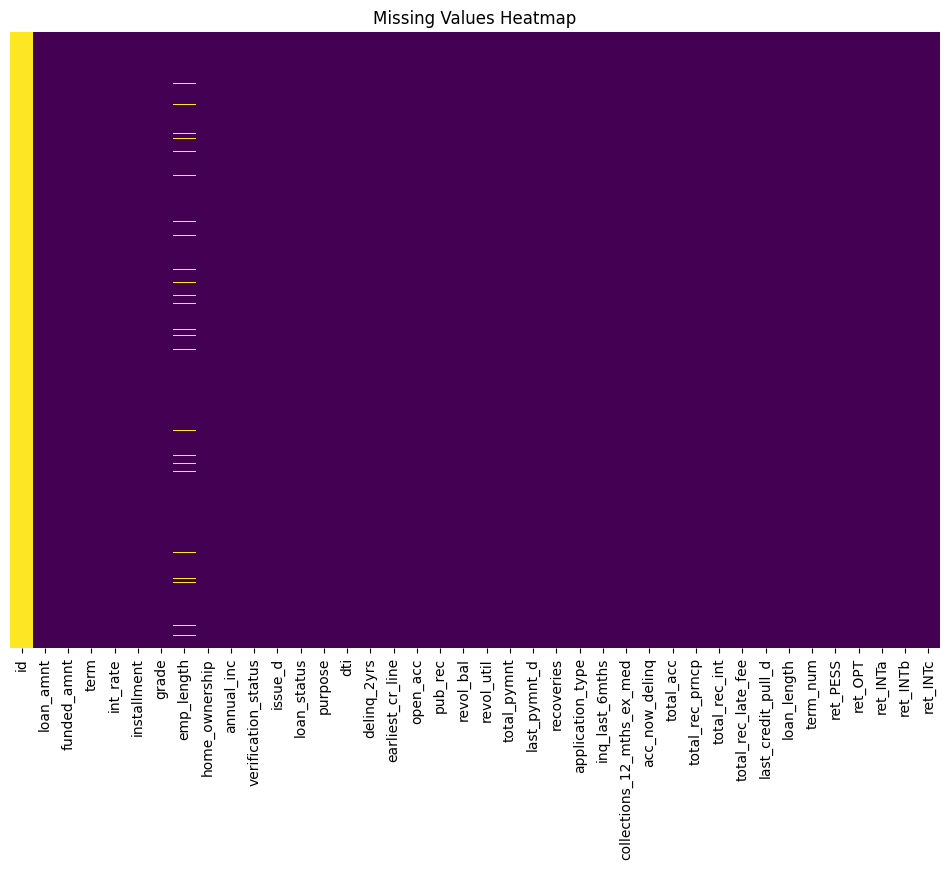

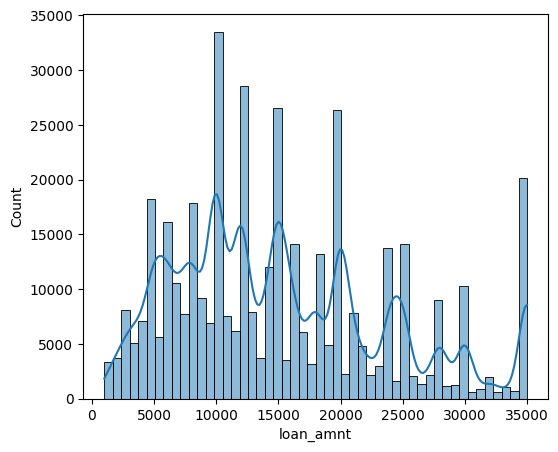

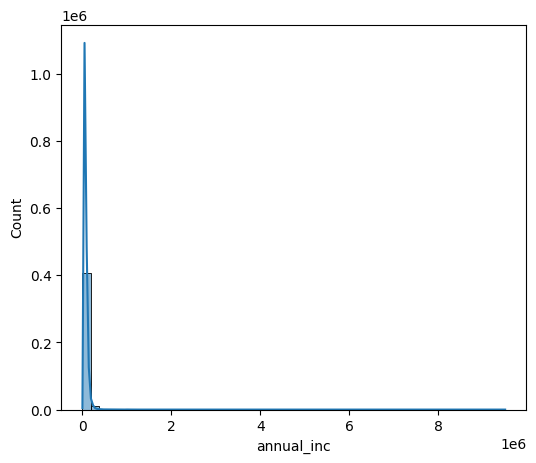

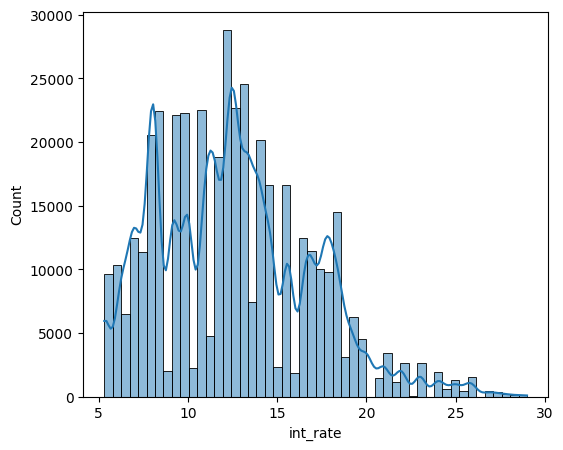

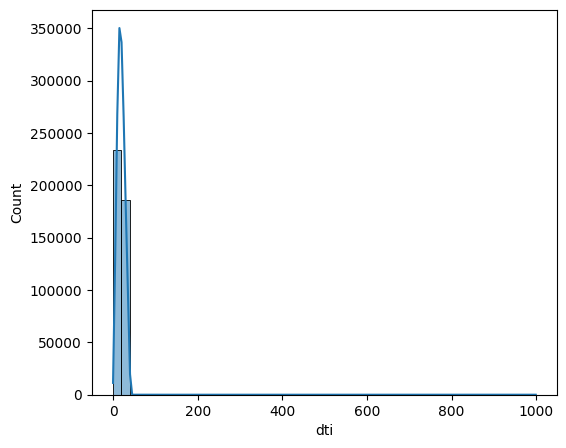

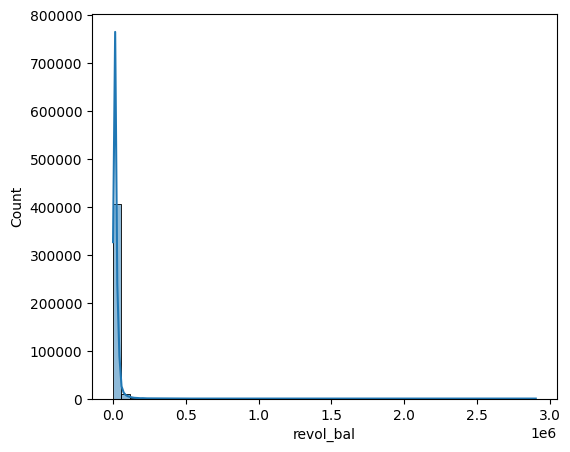

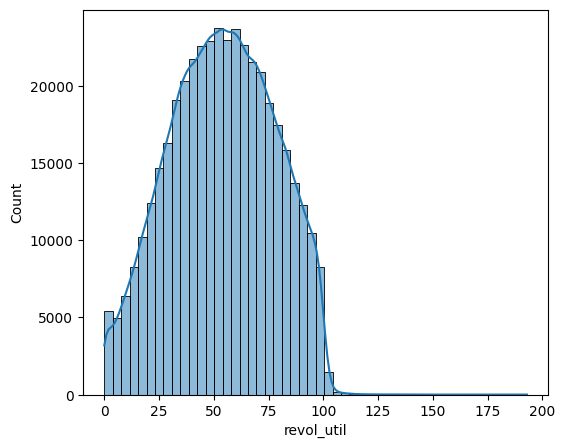

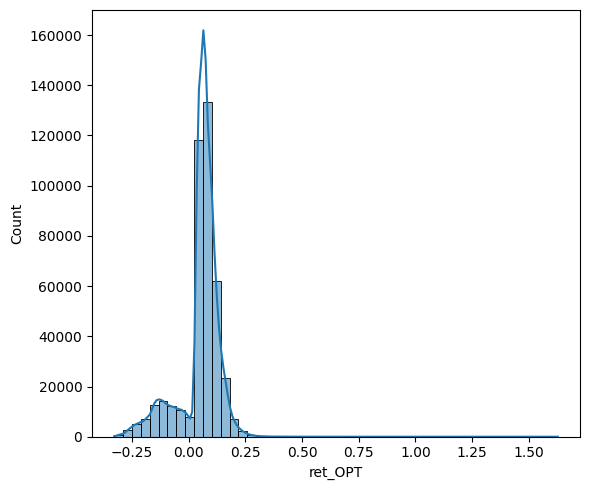

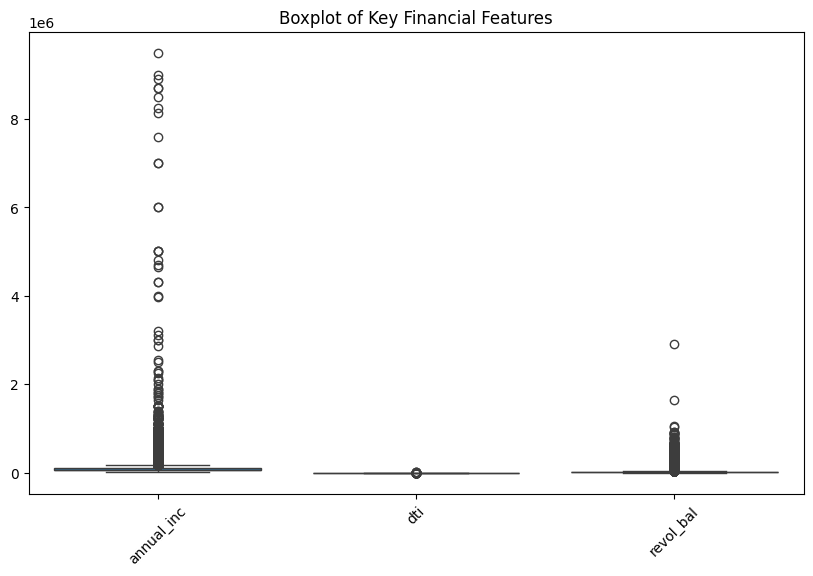

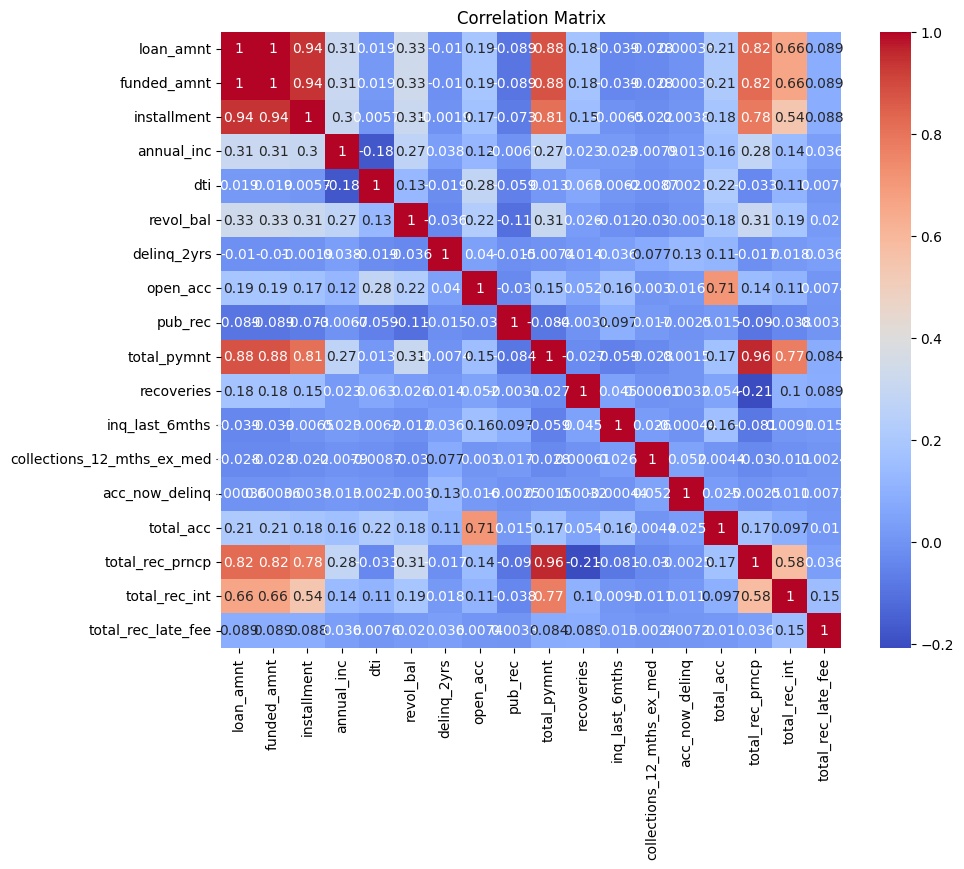

In [29]:
#You can download the archived data for 2014 from the WayBack machine here:
# https://web.archive.org/web/20220618001912/https://resources.lendingclub.com/LoanStats3c.csv.zip
# For the 2015 data, use
# https://web.archive.org/web/20230522033024/https://resources.lendingclub.com/LoanStats3d.csv.zip
# Download both zip files and unzip them.
# Put both these unzipped files in the appropriate folder ("../data" below) before proceeding below.
# The data dictionary is here: https://web.archive.org/web/20200606105339/https://resources.lendingclub.com/LCDataDictionary.xlsx}
dir_data = pd.read_csv('/content/LoanStats3d.csv')

from typing import Dict
def ingest_files(directory: str) -> Dict:
    """
    This function will ingest the CSV file in the specified directory
    into a pandas dataframe. It will return a dictionary containing
    the dataframe, keyed by the file name.

    We assume the directory contains the 'LoanStats3c 2.csv' file.
    """
    file_name = 'LoanStats3d.csv' # name of the csv file
    file_path = os.path.join(directory, file_name)

    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    print(f"Reading file {file_name} from directory {directory}")

    # Read the csv file into a pandas dataframe
    output = {file_name: pd.read_csv(file_path, dtype=str, skiprows=1)}

    return output

# Call the function with the directory containing the CSV file
files_data = ingest_files("/content/")

files_data.keys()

data_now = pd.concat(files_data.values()).reset_index(drop = True)
columns = list(data_now.columns)
columns

# Identify the columns we'll be keeping from the dataset
cols_to_pick = ['id','loan_amnt','funded_amnt','term','int_rate',
                 'installment','grade','emp_length', 'home_ownership',
                 'annual_inc','verification_status','issue_d',
                 'loan_status','purpose','dti', 'delinq_2yrs',
                 'earliest_cr_line','open_acc','pub_rec',
                 'revol_bal','revol_util', 'total_pymnt',
                 'last_pymnt_d', 'recoveries','application_type', 'inq_last_6mths', 'collections_12_mths_ex_med',
                 'acc_now_delinq', 'total_acc', 'total_rec_prncp', 'total_rec_int',
                 'total_rec_late_fee', 'last_credit_pull_d']

# Identify the type of each of these columns
float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
              'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
              'total_pymnt', 'recoveries', 'inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq',
              'total_acc', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

cat_cols = ['term', 'grade', 'emp_length', 'home_ownership',
            'verification_status', 'loan_status', 'purpose',
            'application_type']

perc_cols = ['int_rate', 'revol_util']

date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

# Ensure that we have types for every column
assert set(cols_to_pick) - set(float_cols) - set(cat_cols) - set(perc_cols) - set(date_cols) == set(["id"])


# Keep only the columns of interest
final_data = data_now[cols_to_pick].copy()

print("Starting with " + str(len(final_data)) + " rows")



for i in float_cols:
    final_data[i] = final_data[i].astype(float)

def clean_perc(x):
    if pd.isnull(x):
        return np.nan
    else:
        return float(x.rstrip()[:-1])
for i in perc_cols:
    final_data[i] = final_data[i].apply( clean_perc )

def clean_date(x):
    if pd.isnull(x):
        return None
    else:
        return datetime.datetime.strptime( x, "%b-%Y").date()
for i in date_cols:
    final_data[i] = final_data[i].apply( clean_date )

for i in cat_cols:
    final_data.loc[final_data[i].isnull(), i] = None



# Deal with null values. We allow categorical variables to be null
# OTHER than grade, which is a particularly important categorical.
# All non-categorical variables must be non-null, and we drop
# rows that do not meet this requirement
required_cols = set(cols_to_pick) - set(cat_cols) - set(["id"])
required_cols.add("grade")

n_rows = len(final_data)
final_data.dropna(subset = required_cols ,inplace=True)
print("Removed " + str(n_rows - len(final_data)) + " rows")

### Define the names of the four returns we'll be calculating

ret_cols = ["ret_PESS", "ret_OPT", "ret_INTa", "ret_INTb", "ret_INTc"]
## Remove all rows for loans that were paid back on the days
# they were issued
final_data['loan_length'] = (final_data.last_pymnt_d - final_data.issue_d) / np.timedelta64(1, 'D')  # Changed to 'D' for days
final_data['loan_length'] = final_data['loan_length'] / 30.436875  # approximate average number of days in a month.
n_rows = len(final_data)
final_data = final_data[final_data.loan_length != 0]
print("Removed " + str(n_rows - len(final_data)) + " rows")


# Calculate the return using a simple annualized profit margin
# Pessimistic definition (method 2)

final_data['term_num'] = final_data.term.str.extract('(\d+)',expand=False).astype(int)
final_data['ret_PESS'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['term_num'])

# Assuming that if a loan gives a positive return, we can
# immediately find a similar loan to invest in; if the loan
# takes a loss, we use method 2 to compute the return

final_data['ret_OPT'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['loan_length'])
final_data.loc[final_data.ret_OPT < 0,'ret_OPT'] = final_data.ret_PESS[final_data.ret_OPT < 0]

def ret_method_3(T, i):
    '''
    Given an investment time horizon (in months) and re-investment
    interest rate, calculate the return of each loan
    '''

    # Assuming that the total amount paid back was paid at equal
    # intervals during the duration of the loan, calculate the
    # size of each of these installment
    actual_installment = (final_data.total_pymnt - final_data.recoveries) / final_data['loan_length']

    # Assuming the amount is immediately re-invested at the prime
    # rate, find the total amount of money we'll have by the end
    # of the loan
    cash_by_end_of_loan = actual_installment * (1 - pow(1 + i, final_data.loan_length)) / ( 1 - (1 + i) )

    cash_by_end_of_loan = cash_by_end_of_loan + final_data.recoveries

    # Assuming that cash is then re-invested at the prime rate,
    # with monthly re-investment, until T months from the start
    # of the loan
    remaining_months = T - final_data['loan_length']
    final_return = cash_by_end_of_loan * pow(1 + i, remaining_months)

    # Find the percentage return
    return( (12/T) * ( ( final_return - final_data['funded_amnt'] ) / final_data['funded_amnt'] ) )

final_data['ret_INTa'] = ret_method_3(5*12, 0.001)
final_data['ret_INTb'] = ret_method_3(5*12, 0.0025)
final_data['ret_INTc'] = ret_method_3(5*12, 0.005)


#Question 3
plt.figure(figsize=(12, 8))
sns.heatmap(final_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Plot distributions
num_vars = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal','revol_util','ret_OPT']
# final_data[num_vars].hist(bins=50, figsize=(12, 8),kde=True)
# plt.tight_layout()
# plt.show()
for col in num_vars:
    plt.figure(figsize=(6,5))
    sns.histplot(final_data[col], bins=50, kde=True)
plt.tight_layout()
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data[['annual_inc', 'dti', 'revol_bal']])
plt.title("Boxplot of Key Financial Features")
plt.xticks(rotation=45)
plt.show()

#Multiple variable summary
# Correlation matrix for numeric data
corr = final_data[float_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# **Major Differences Between 2014 and 2015 Data Sets**

**Loan Volume and Data Size:**

  - The 2015 dataset has a higher volume of loans compared to 2014, reflecting an increase in LendingClub’s loan issuance.

  - The number of records increased in 2015, indicating broader adoption and more investor participation.

**Interest Rates and Loan Terms:**

  - Average interest rates increased slightly in 2015, suggesting a shift toward higher-risk loans or a rise in market rates.

  - Higher variance in loan amounts and interest rates in 2015 reflects a more diverse loan pool.

**Credit Risk and Borrower Profile:**

  - Debt-to-income (DTI) and revolving balance increased in 2015, indicating that borrowers carried more debt, increasing repayment risk.

**Loan Performance and Returns:**

  - Recovery rates after defaults declined slightly in 2015, suggesting that loans were riskier and harder to recover after default.

In Conclusion, The 2015 dataset reflects a shift toward higher-risk, higher-reward lending with increased borrower debt levels and more variance in loan performance. While higher potential returns emerged, default risk and repayment uncertainty also increased. A more diversified, balanced portfolio strategy would be required to manage these changes effectively.